# **Project Name**    - Health Insurance Cross Sell Prediction


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Shaikh Mazheruddin Fahad


# **Project Summary -**

Our client, an insurance company, seeks to develop a predictive model to determine whether customers who have health insurance will also be interested in purchasing vehicle insurance.

The insurance industry operates on the principle of risk sharing, where customers pay a regular premium for coverage against specified losses, such as damage, illness, or death. The company compensates for these losses up to a certain limit (sum assured). In the context of health insurance, customers pay an annual premium for coverage of hospitalization and related expenses. Similarly, in vehicle insurance, customers pay a premium for coverage against accidents and related damages.

# **Problem Statement**


Our client, an insurance company, currently offers Health Insurance to its customers and is seeking to expand its offerings by introducing Vehicle Insurance. The company needs to predict whether their existing Health Insurance policyholders would be interested in purchasing Vehicle Insurance.

Health Insurance policies provide a guarantee of compensation for specified losses, such as hospitalization costs, in return for regular premium payments. Similarly, Vehicle Insurance requires customers to pay an annual premium to cover potential losses or damages to their vehicles.

To effectively market Vehicle Insurance to their Health Insurance customers, the company requires a predictive model that can identify customers likely to be interested in Vehicle Insurance. This would enable the company to tailor its communication strategies and optimize its business model and revenue.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# import warnings
import warnings
warnings .filterwarnings('ignore')
from IPython.utils import io
warnings.filterwarnings("ignore", category=DeprecationWarning)
try:
    with io.capture_output() as captured:
        if should_run_async(code):
            transformed_code = transformed_cell(code)
        else:
            transformed_code = code
except Exception as e:
    preprocessing_exc_tuple = (type(e), e, None)
else:
    preprocessing_exc_tuple = None

In [ ]:
# Importing libraries for data preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Importing specific models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    recall_score, precision_score, f1_score, accuracy_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

# Importing plotting libraries
from mlxtend.plotting import plot_confusion_matrix

# Importing specific machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier
from lightgbm import LGBMClassifier  # LightGBM Classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
import xgboost as xgb  # XGBoost library
from xgboost import XGBClassifier  # XGBoost Classifier

# Importing modules for hyperparameter tuning
from sklearn.model_selection import GridSearchCV  # Grid Search Cross-Validation
from sklearn.model_selection import RandomizedSearchCV  # Randomized Search Cross-Validation

# Additional imports for statistical operations and random number generation
from scipy.stats import randint as sp_randint
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/Data_Science/Mid_summative/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df = pd.read_csv(path)

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f' The number of Rows and Columns in the given Dataset {df.shape}')

 The number of Rows and Columns in the given Dataset (381109, 12)


### Dataset Information

**Variables present in dataset:**

---

**ID:** Unique identifier for the Customer.

**Age:** Age of the Customer.

**Gender:** Gender of the Customer.

**Driving_License:** 0 for customer not having DL, 1 for customer having DL.

**Region_Code:** Unique code for the region of the customer.

**Previously_Insured:** 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

**Vehicle_Age:** Age of the vehicle.

**Vehicle_Damage:** Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

**Annual_Premium:** The amount customer needs to pay as premium in the year.

**Policy_Sales_Channel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

**Vintage:** Number of Days, Customer has been associated with the company.

**Response:** 1 for Customer is interested, 0 for Customer is not interested.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Is there duplicated ? {df.duplicated().value_counts()},unique values with {len(df[df.duplicated()])} duplication")

Is there duplicated ? False    381109
Name: count, dtype: int64,unique values with 0 duplication


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

Our dataset consists of 3,81,109 rows and 12 columns, with no missing values. Among the features, we have 4 numeric and 5 categorical independent variables. The target variable, 'Response', is categorical.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f'Columns : {df.columns.to_list()}')

Columns : ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values present in column",i,"is",df[i].nunique())

No. of unique values present in column id is 381109
No. of unique values present in column Gender is 2
No. of unique values present in column Age is 66
No. of unique values present in column Driving_License is 2
No. of unique values present in column Region_Code is 53
No. of unique values present in column Previously_Insured is 2
No. of unique values present in column Vehicle_Age is 3
No. of unique values present in column Vehicle_Damage is 2
No. of unique values present in column Annual_Premium is 48838
No. of unique values present in column Policy_Sales_Channel is 155
No. of unique values present in column Vintage is 290
No. of unique values present in column Response is 2


## 3. ***Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

####Treating Duplicates

In [ ]:
print(f"Is there duplicated ? {df.duplicated().value_counts()},unique values with {len(df[df.duplicated()])} duplication")

Is there duplicated ? False    381109
Name: count, dtype: int64,unique values with 0 duplication


####Treating Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

The dataset provided is clean, with no missing or duplicate values, so there was no need for missing value imputation or any other data manipulation techniques.

### 2.  Handling Outliers

####Detecting Anamoly

In [ ]:
#checking for normal distribution in Annual Premium
print("Skewness - Annual_Premium: %f" % df['Annual_Premium'].skew())
print("Kurtosis - Annual_Premium: %f" % df['Annual_Premium'].kurt())

Skewness - Annual_Premium: 1.766087
Kurtosis - Annual_Premium: 34.004569


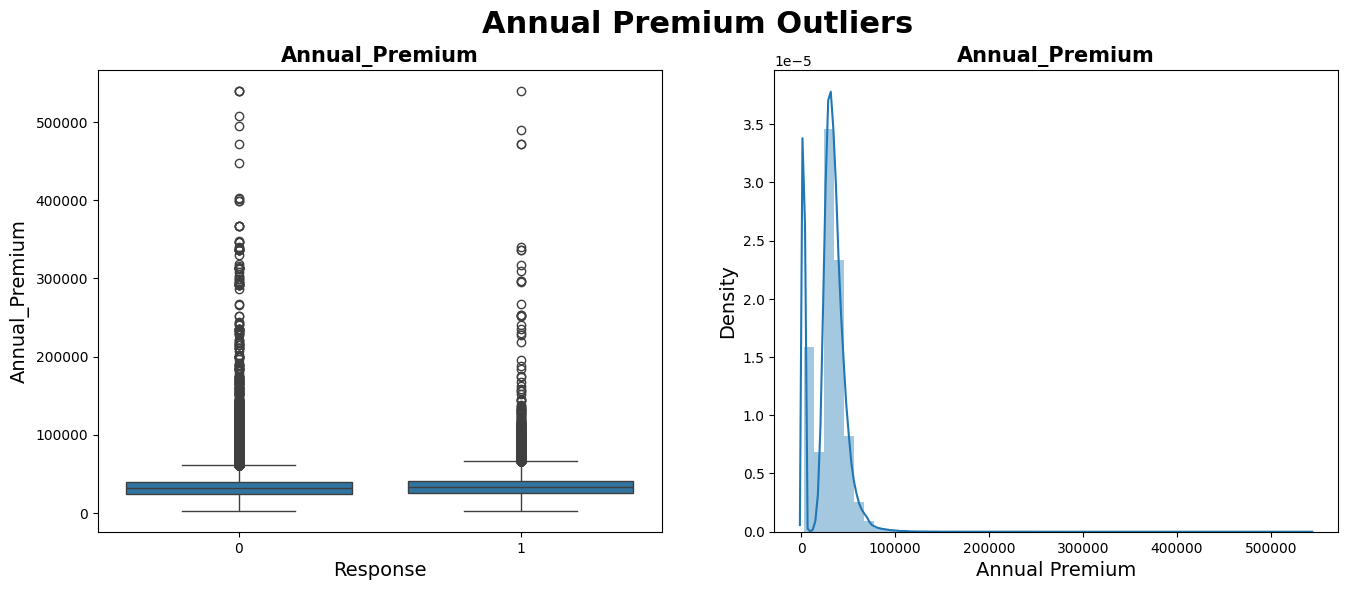

In [ ]:
def show_annual_premium_outliers(df):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Boxplot for Annual_Premium
    sns.boxplot(ax=axes[0], y='Annual_Premium', x='Response', data=df)
    axes[0].set_xlabel('Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel('Annual_Premium', fontdict={'fontsize': 14})
    axes[0].set_title('Annual_Premium', fontdict={'fontsize': 15, 'fontweight': 'bold'})

    # Distribution plot for Annual_Premium
    sns.distplot(df['Annual_Premium'], ax=axes[1])
    axes[1].set_xlabel('Annual Premium', fontdict={'fontsize': 14})
    axes[1].set_ylabel('Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual_Premium', fontdict={'fontsize': 15, 'fontweight': 'bold'})

    plt.suptitle('Annual Premium Outliers', fontsize=22, fontweight='bold')

show_annual_premium_outliers(df)

The above plot indicates that the distribution of Annual Premium is positively skewed.

In [ ]:
#checking for normal distribution in Age
print("Skewness - Age: %f" % df['Age'].skew())
print("Kurtosis - Age: %f" % df['Age'].kurt())

Skewness - Age: 0.672539
Kurtosis - Age: -0.565655


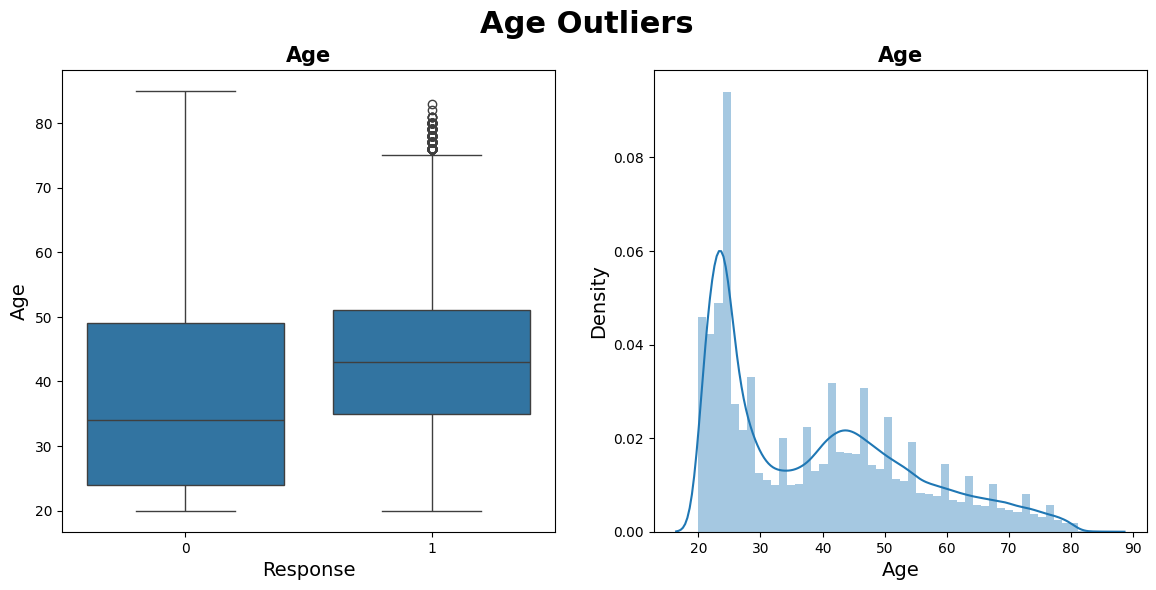

In [ ]:
def show_age_outliers(df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Boxplot for Age
    sns.boxplot(ax=axes[0], y='Age', x='Response', data=df)
    axes[0].set_xlabel('Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel('Age', fontdict={'fontsize': 14})
    axes[0].set_title('Age', fontdict={'fontsize': 15, 'fontweight': 'bold'})

    # Distribution plot for Age
    sns.distplot(ax=axes[1], x=df['Age'])
    axes[1].set_xlabel('Age', fontdict={'fontsize': 14})
    axes[1].set_ylabel('Density', fontdict={'fontsize': 14})
    axes[1].set_title('Age', fontdict={'fontsize': 15, 'fontweight': 'bold'})

    plt.suptitle('Age Outliers', fontsize=22, fontweight='bold')

show_age_outliers(df)

The Age column contains some outliers, but we will not address them as they are unlikely to impact our results.

In [ ]:
#checking for normal distribution in Vintage
print("Skewness - Vintage: %f" % df['Vintage'].skew())
print("Kurtosis - Vintage: %f" % df['Vintage'].kurt())

Skewness - Vintage: 0.003030
Kurtosis - Vintage: -1.200688


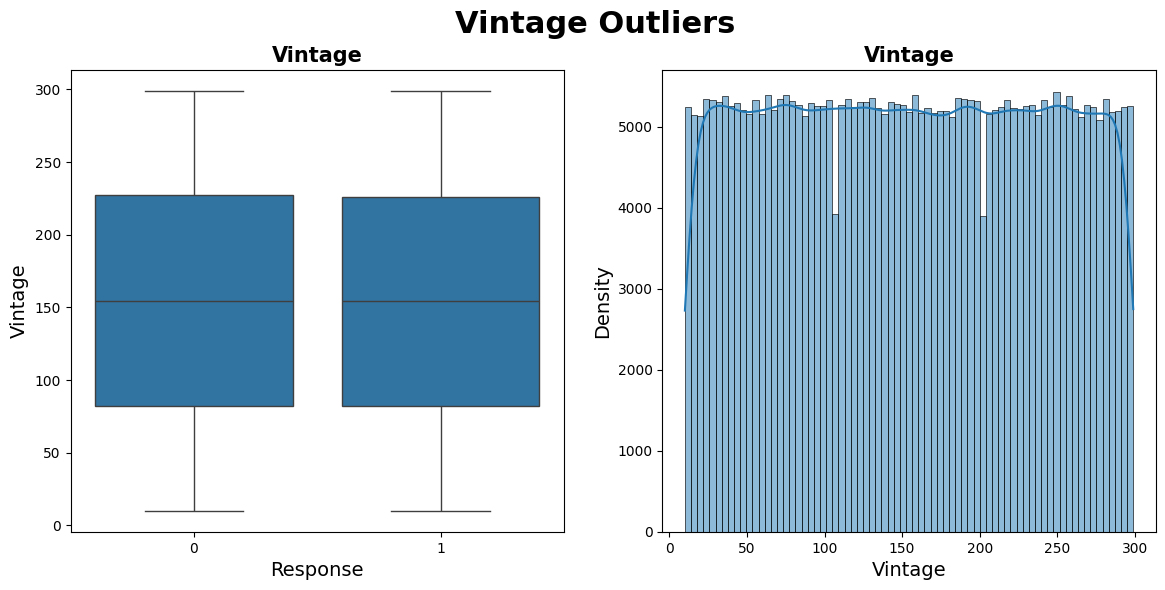

In [ ]:
def show_vintage_outliers(df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Boxplot for Vintage
    sns.boxplot(ax=axes[0], y='Vintage', x='Response', data=df)
    axes[0].set_xlabel('Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel('Vintage', fontdict={'fontsize': 14})
    axes[0].set_title('Vintage', fontdict={'fontsize': 15, 'fontweight': 'bold'})

    # Distplot for Vintage
    sns.histplot(ax=axes[1], x=df['Vintage'], kde=True)
    axes[1].set_xlabel('Vintage', fontdict={'fontsize': 14})
    axes[1].set_ylabel('Density', fontdict={'fontsize': 14})
    axes[1].set_title('Vintage', fontdict={'fontsize': 15, 'fontweight': 'bold'})

    plt.suptitle('Vintage Outliers', fontsize=22, fontweight='bold')

show_vintage_outliers(df)

From the above visualization, we can also observe that the 'Vintage' feature has an approximately uniform distribution.

####Treating Outlier

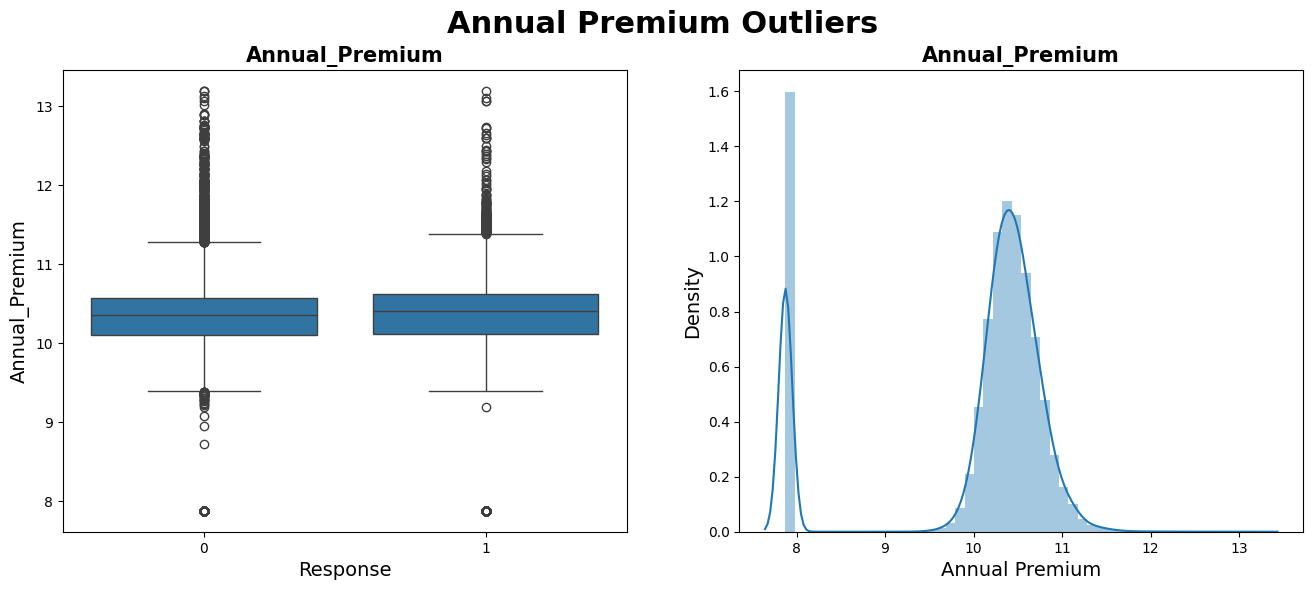

In [ ]:
def treat_outliers(df):
    # Treating Annual_Premium (Positively Skewed)
    # Log transformation
    df['Annual_Premium'] = np.log1p(df['Annual_Premium'])
    return df

df = treat_outliers(df)  # Treat outliers
show_annual_premium_outliers(df)  # Visualize after treatment

In [ ]:
#checking for normal distribution after treating outliers
print("Skewness - Annual_Premium: %f" % df['Annual_Premium'].skew())
print("Kurtosis - Annual_Premium: %f" % df['Annual_Premium'].kurt())

Skewness - Annual_Premium: -1.470591
Kurtosis - Annual_Premium: 0.657275


#### What all outlier treatment techniques have you used and why did you use those techniques?

I utilized a comprehensive approach to outlier treatment by initially assessing the skewness and kurtosis of key columns, including Annual_Premium, Age, and Vintage, supported by visual representations through bar plots and distribution plots. Recognizing the positively skewed nature of the Annual_Premium column, I applied a log transformation to mitigate skewness while maintaining data integrity. Conversely, I opted not to address outliers in the Age column as they were deemed inconsequential to the analysis. The Vintage column, exhibiting a uniform distribution, required no outlier treatment. These decisions were made to enhance data reliability and ensure that outlier treatment strategies were tailored to each column's unique characteristics, thereby optimizing subsequent analyses and modeling endeavors.

### 3.  Feature Encoding

In [ ]:
print(f'Columns : {df.columns.to_list()}')

Columns : ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [ ]:
# Encode 'Gender' feature: Female as 1, Male as 0
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

# Encode 'Vehicle_Damage' feature: Yes as 1, No as 0
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

# Encode 'Vehicle_Age' feature based on categories: '< 1 Year' as 0, '1-2 Year' as 1, '> 2 Years' as 2
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,10.607946,26.0,217,1
1,2,0,76,1,3.0,0,1,0,10.420405,26.0,183,0
2,3,0,47,1,28.0,0,2,1,10.553075,26.0,27,1
3,4,0,21,1,11.0,1,0,0,10.261861,152.0,203,0
4,5,1,29,1,41.0,1,0,0,10.221832,152.0,39,0


In [ ]:
df.loc[(df['Age']>=20) & (df['Age']<27),'Age_label']='Teenagers'
df.loc[(df['Age']>=27) & (df['Age']<29),'Age_label']='Youngster'
df.loc[(df['Age']>=29) & (df['Age']<58),'Age_label']='Adults'
df.loc[(df['Age']>=58) & (df['Age']<=85),'Age_label']='Seniors'

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

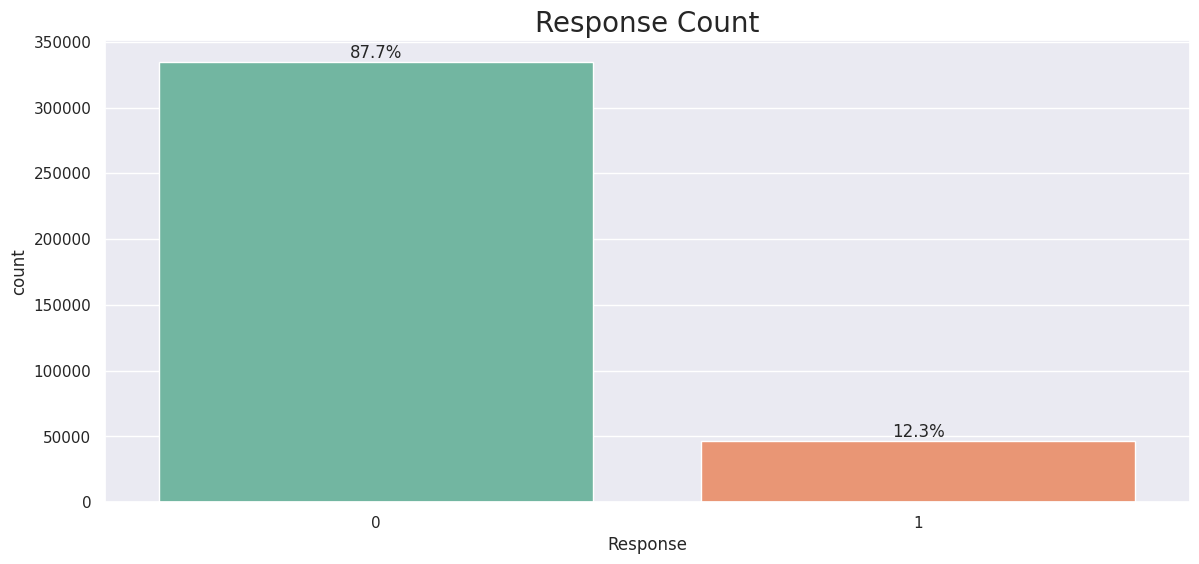

In [ ]:
# Chart - 1 visualization code
sns.set(style="darkgrid")

# Set the size of the figure
plt.figure(figsize=(14, 6))
total = float(len(df))

# Create a count plot for the 'Response' column
ax = sns.countplot(x='Response', data=df, palette='Set2')

plt.title('Response Count', fontsize=20)

for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the coordinates for the annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

#####  What is/are the insight(s) found from the chart?

While analyzing a dataset where the distribution of interest levels is highly imbalanced. Specifically, about 87.7% of the dataset consists of individuals who are not interested, while only 12.3% are interested.

#### Chart - 2

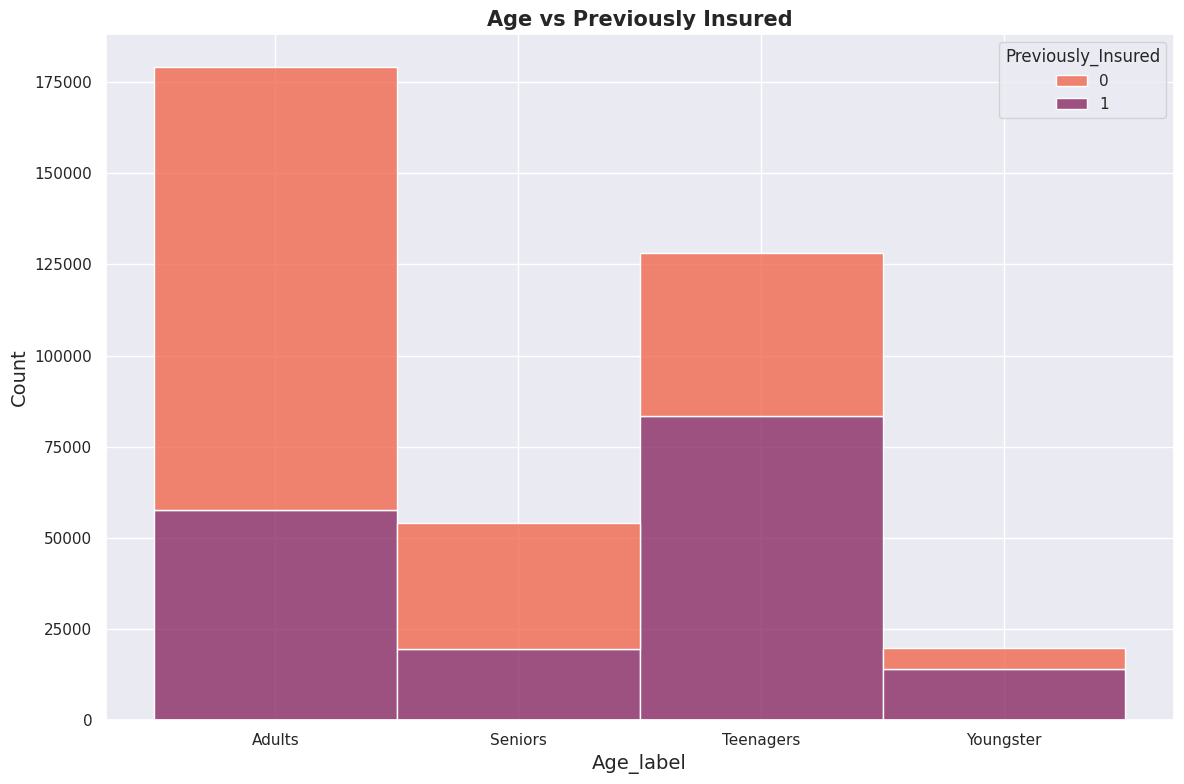

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 8))

# Plotting Age_label vs Previously_Insured using sns.histplot
sns.histplot(data=df, x='Age_label', hue='Previously_Insured', multiple='stack', palette='rocket_r')
plt.xlabel('Age_label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Age vs Previously Insured', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

#####  What is/are the insight(s) found from the chart?

From the above stacked bar chart we can sat that as people enter adulthood, they are more likely to take on the responsibility of owning and insuring a vehicle. As people age, they may be less likely to need or want vehicle insurance.

#### Chart - 3

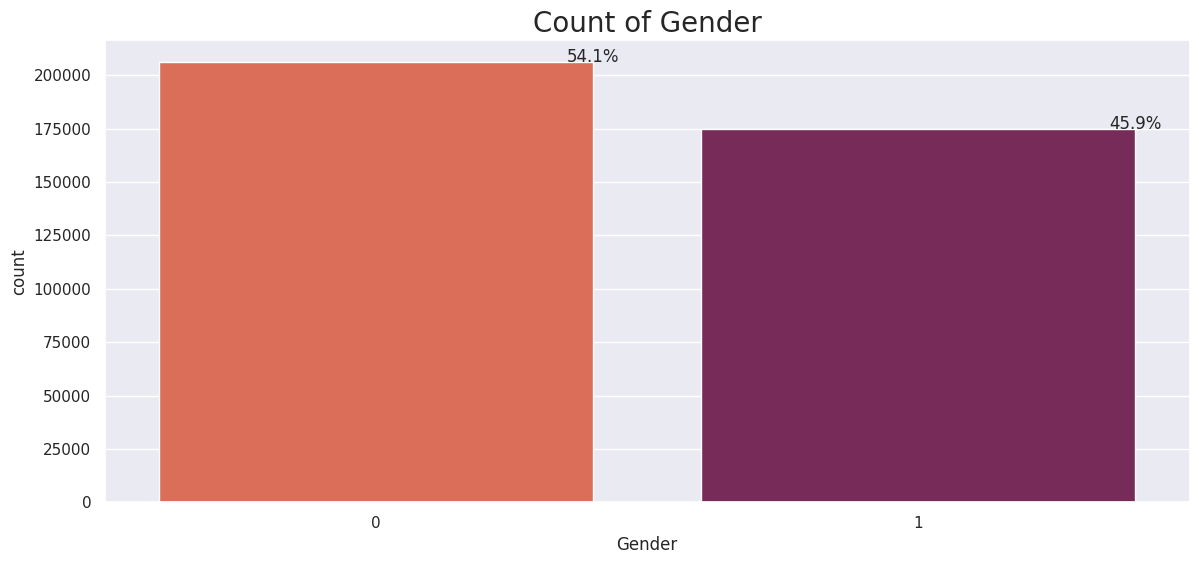

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Gender',palette="rocket_r", data=df)
plt.title('Count of Gender',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.show()

#####  What is/are the insight(s) found from the chart?

The chart shows that there are more males (represented by 0) than females (represented by 1) in the health insurance data set. The exact numbers are 54.1% males and 45.9% females. This information is helpful for understanding the demographic distribution of the dataset and may impact the analysis of factors related to gender in the dataset

#### Chart - 4

<Figure size 1400x600 with 0 Axes>

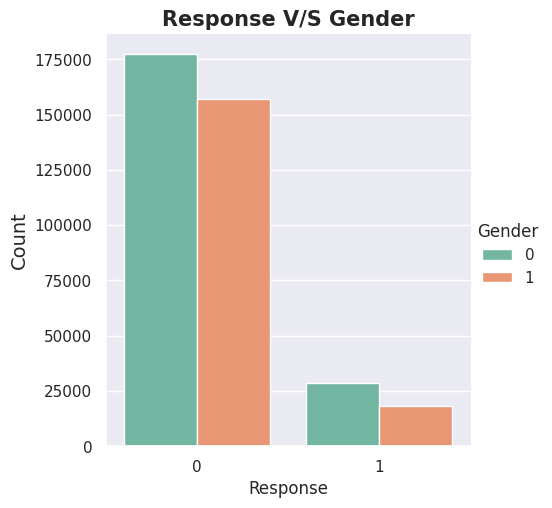

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(14,6))

sns.catplot(x="Response", hue="Gender", kind="count",palette="Set2",data=df)
plt.xlabel('Response', fontdict={'fontsize':12})
plt.ylabel('Count',fontdict={'fontsize': 14})
plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})

plt.show()

#####  What is/are the insight(s) found from the chart?

In the dataset, the number of male customers appears to outnumber female customers, as evidenced by the higher count of male entries compared to females.

#### Chart - 5

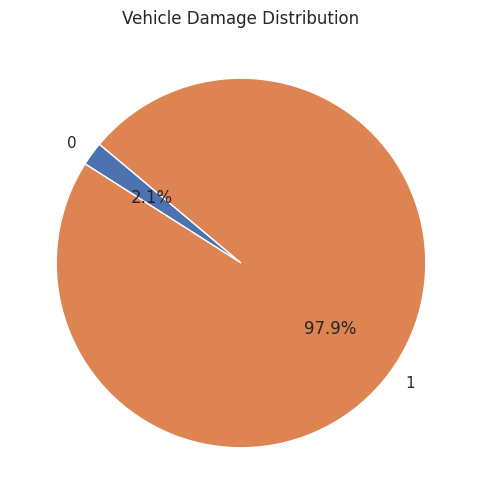

In [ ]:
# Chart - 5 visualization code
# Calculate counts for each category of Vehicle_Damage
counts = df.groupby('Vehicle_Damage')['Response'].value_counts().unstack()

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 6))
plt.pie(counts[1], labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Vehicle Damage Distribution')

plt.show()

#####  What is/are the insight(s) found from the chart?

In this dataset pie plot visually represents the distribution of customers based on whether their vehicles are damaged or not. It succinctly illustrates the proportion of customers falling into each category: those with damaged vehicles and those with vehicles that are not damaged.

#### Chart - 6

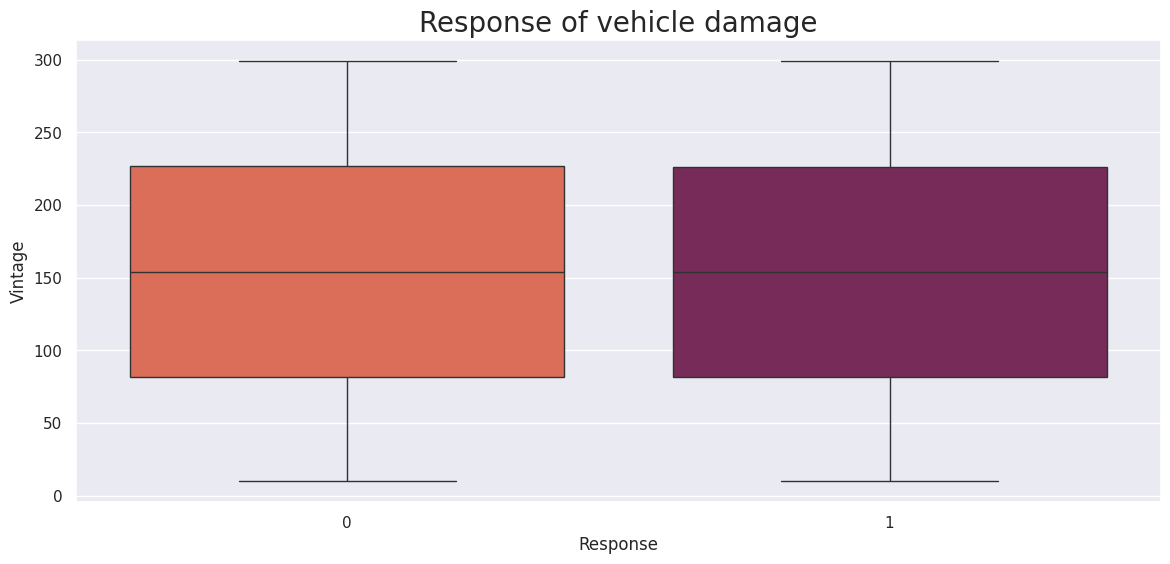

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(14,6))
sns.boxplot(x='Response',y='Vintage',palette="rocket_r", data=df)
plt.title('Response of vehicle damage',fontsize=20)
plt.show()

#####  What is/are the insight(s) found from the chart?

From this box plot, it's evident that the distribution of the 'Vintage' feature is nearly uniform.

#### Chart - 7

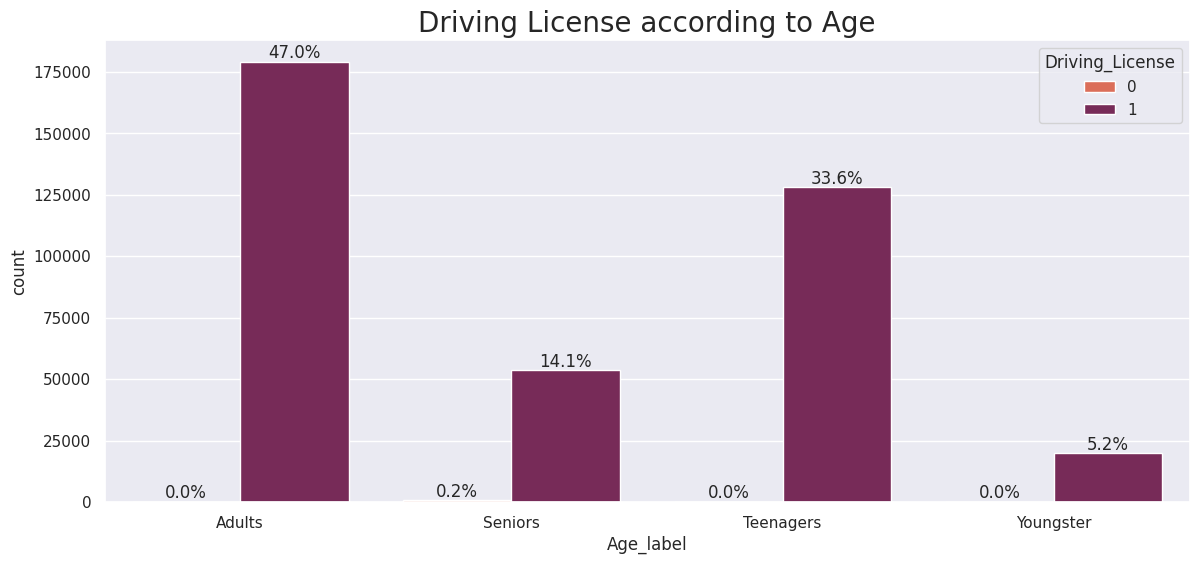

In [ ]:
# Chart - 7 visualization code
sns.set(style="darkgrid")
plt.figure(figsize=(14, 6))

# Calculate the total number of samples
total = float(len(df))

# Create a count plot for 'Age_label' with 'Driving_License' as the hue
ax = sns.countplot(x='Age_label', hue='Driving_License', palette="rocket_r", data=df)

# Set the title of the plot
plt.title('Driving License according to Age', fontsize=20)

# Annotate each bar with the percentage
for p in ax.patches:
    height=p.get_height()
    if height > 0:  # Only annotate bars with a positive height
        percentage = '{:.1f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

    # percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # x = p.get_x() + p.get_width() / 2
    # y = p.get_height()
    # ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

#####  What is/are the insight(s) found from the chart?

In this bar plot, it's evident that nearly half of the adult population sampled possess a driver's license, accounting for approximately 47% of the individuals surveyed. This indicates a significant portion of the group has the legal authorization to drive.

#### Chart - 8

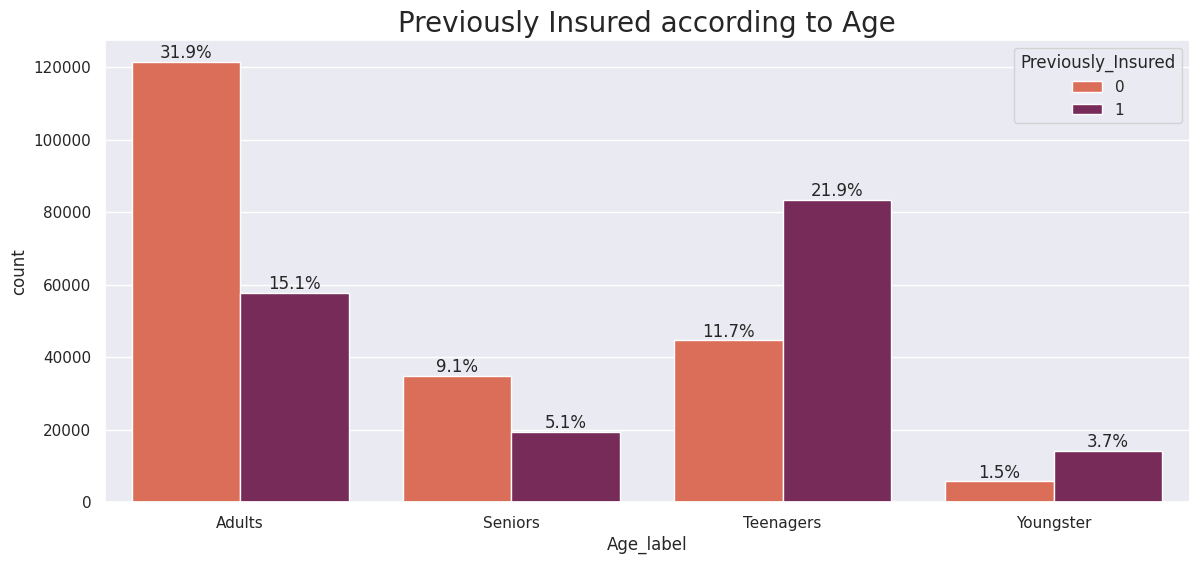

In [ ]:
# Chart - 8 visualization code
sns.set(style="darkgrid")
plt.figure(figsize=(14, 6))

# Calculate the total number of samples
total = float(len(df))

# Create a count plot for 'Age_label' with a hue for 'Previously_Insured' and a specified palette
ax = sns.countplot(x='Age_label', hue='Previously_Insured', palette="rocket_r", data=df)

# Set the title of the plot
plt.title('Previously Insured according to Age', fontsize=20)

# Annotate each bar in the count plot with the percentage
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with a positive height
        percentage = '{:.1f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

#####  What is/are the insight(s) found from the chart?

In the bar plot, it's observed that 21.9% of individuals in their teenage years had previous insurance coverage, while 31.9% of adults did not have previous insurance coverage.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Age", "Region_Code", "Policy_Sales_Channel", "Vintage"),
    vertical_spacing=0.15,
    horizontal_spacing=0.1
)

# Age Count Plot
fig.add_trace(
    px.histogram(df, x='Age', color='Response', barmode='group').data[0],
    row=1, col=1
)
fig.add_trace(
    px.histogram(df, x='Age', color='Response', barmode='group').data[1],
    row=1, col=1
)

# Region_Code Count Plot
fig.add_trace(
    px.histogram(df, x='Region_Code', color='Response', barmode='group').data[0],
    row=1, col=2
)
fig.add_trace(
    px.histogram(df, x='Region_Code', color='Response', barmode='group').data[1],
    row=1, col=2
)

# Policy_Sales_Channel Count Plot
fig.add_trace(
    px.histogram(df, x='Policy_Sales_Channel', color='Response', barmode='group').data[0],
    row=2, col=1
)
fig.add_trace(
    px.histogram(df, x='Policy_Sales_Channel', color='Response', barmode='group').data[1],
    row=2, col=1
)

# Vintage Histogram
fig.add_trace(
    px.histogram(df, x='Vintage', color='Response', barmode='group').data[0],
    row=2, col=2
)
fig.add_trace(
    px.histogram(df, x='Vintage', color='Response', barmode='group').data[1],
    row=2, col=2
)

# Update layout to hide x-axis labels for the first three plots
fig.update_xaxes(title_text='', row=1, col=1)
fig.update_xaxes(title_text='', row=1, col=2)
fig.update_xaxes(title_text='', row=2, col=1)

# Update layout for titles and overall figure
fig.update_layout(
    title_text='Distribution of Numerical Features',
    title_font_size=22,
    title_font_family='bold',
    showlegend=True,
    height=800
)

# Show the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

#### Chart - 10

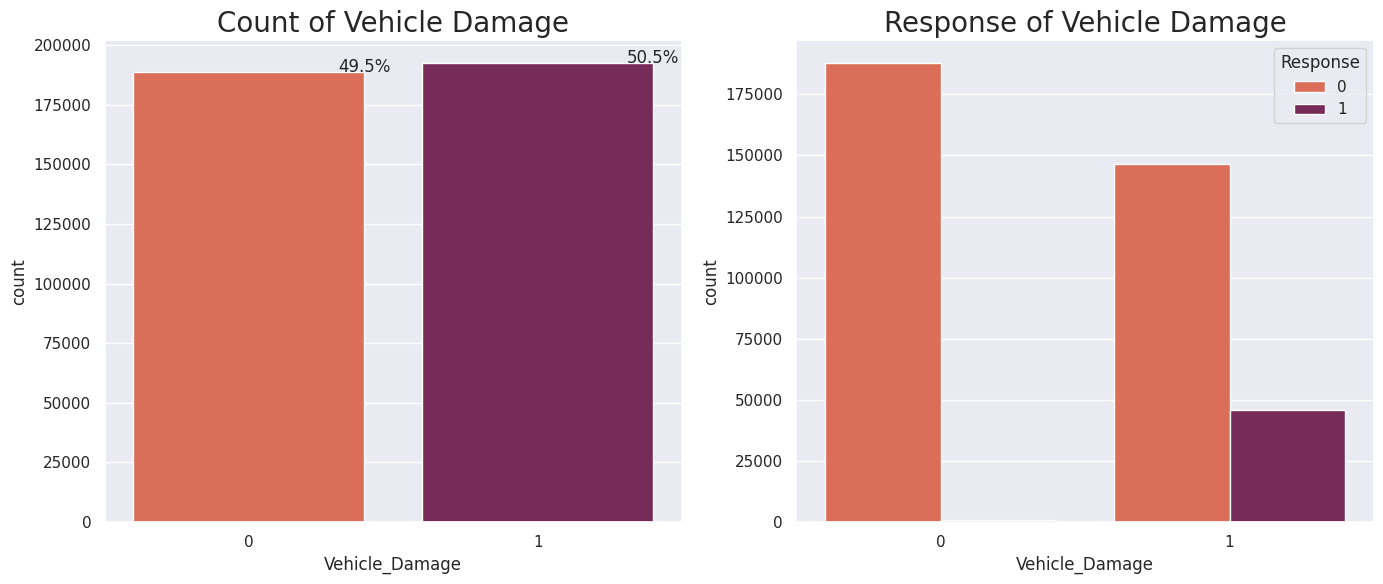

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(14, 6))

# Plot 1: Count of Vehicle Damage
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Vehicle_Damage', palette="rocket_r", data=df)
plt.title('Count of Vehicle Damage', fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center')

# Plot 2: Response of Vehicle Damage
plt.subplot(1, 2, 2)
total = float(len(df))
ax2 = sns.countplot(x='Vehicle_Damage', hue='Response', palette="rocket_r", data=df)
plt.title('Response of Vehicle Damage', fontsize=20)
for p in ax2.patches:
    height=p.get_height()
    if height > 0:  # Only annotate bars with a positive height
        percentage = '{:.1f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

#### Chart - 11

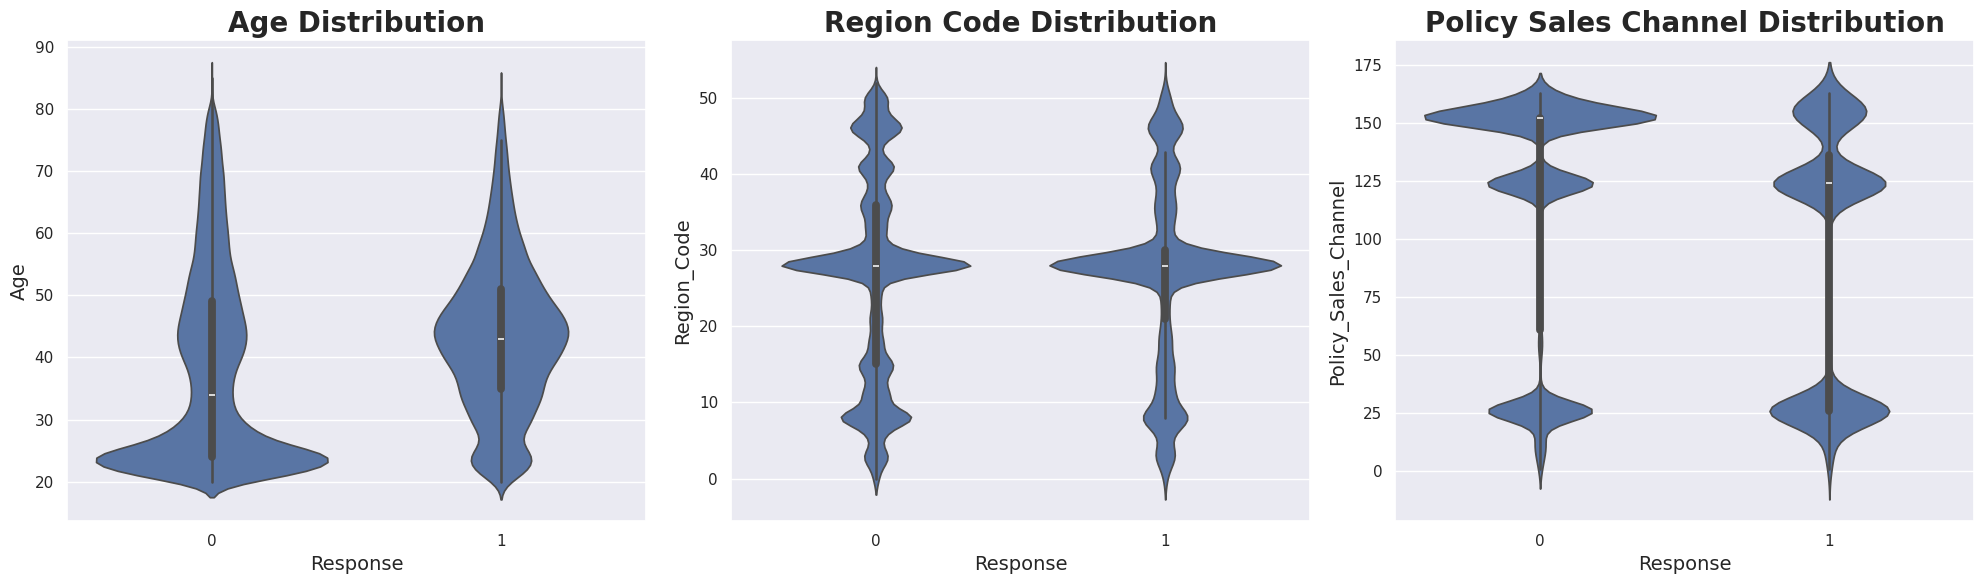

In [ ]:
# Chart - 13 visualization code
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Violin plot for 'Age' distribution
sns.violinplot(y='Age', x='Response', data=df, ax=axes[0])
axes[0].set_xlabel('Response', fontsize=14)
axes[0].set_ylabel('Age', fontsize=14)
axes[0].set_title('Age Distribution', fontsize=20, fontweight='bold')

# Violin plot for 'Region_Code' distribution
sns.violinplot(y='Region_Code', x='Response', data=df, ax=axes[1])
axes[1].set_xlabel('Response', fontsize=14)
axes[1].set_ylabel('Region_Code', fontsize=14)
axes[1].set_title('Region Code Distribution', fontsize=20, fontweight='bold')

# Violin plot for 'Policy_Sales_Channel' distribution
sns.violinplot(y='Policy_Sales_Channel', x='Response', data=df, ax=axes[2])
axes[2].set_xlabel('Response', fontsize=14)
axes[2].set_ylabel('Policy_Sales_Channel', fontsize=14)
axes[2].set_title('Policy Sales Channel Distribution', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

#####  What is/are the insight(s) found from the chart?

To gain deeper insights into the Age feature, which exhibits significant dispersion, I transform it into categorical groups. Similarly, I categorize Region Code and Policy_Sales_Channel to further enhance analysis and understanding of these variables. This categorization will help in visualizing and analyzing patterns and relationships more effectively within these features.

#### Chart - 12 - Correlation Heatmap

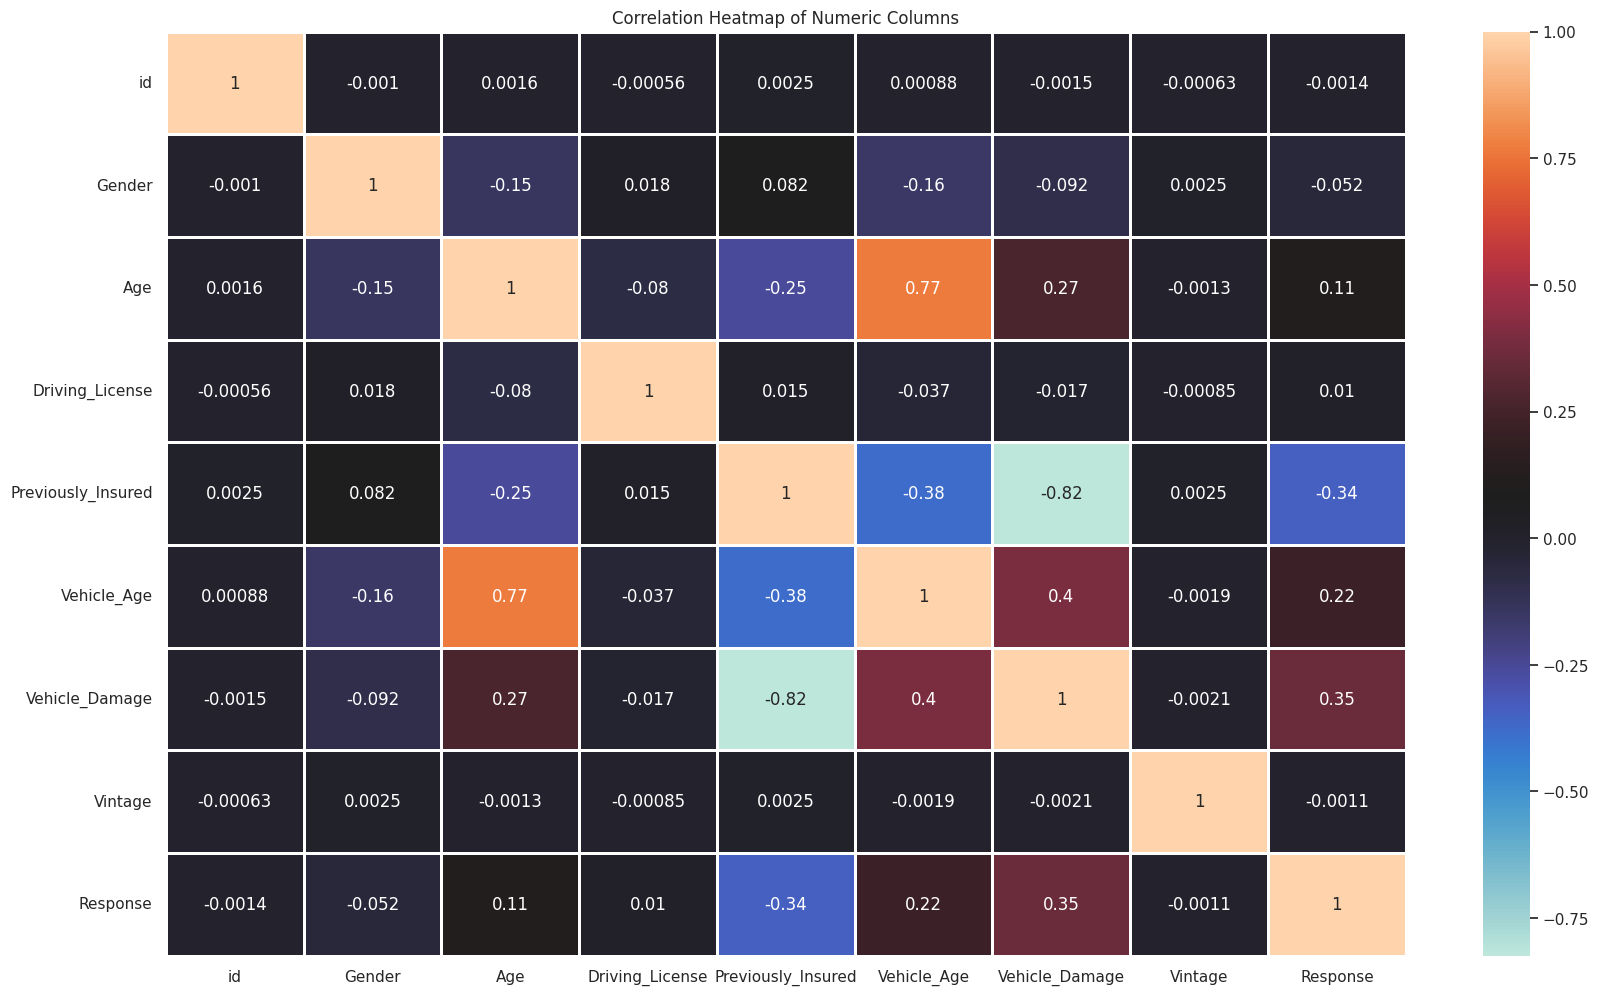

In [ ]:
# Correlation Heatmap visualization code
numeric_df = df.select_dtypes(include=['int64'])

# Plotting heatmap
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(numeric_df.corr(), ax=ax, annot=True, cmap='icefire', linewidths=1)

plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

## ***5. ML Model Implementation***

In [ ]:
x=df[['Gender','Age','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage']]
y=df['Response']

In [ ]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [ ]:
# Resampling
ros = RandomOverSampler(random_state=0)
X_new, y_new = ros.fit_resample(x, y)

print("After Random Over Sampling Of Minor Class Total Samples are:", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Samples are: 668798
Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(468158, 7) (468158,)
(200640, 7) (200640,)


In [ ]:
# Normalizing the Dataset using Standard Scaling Technique
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Displaying the normalized data
print("Normalized Training Data:\n", X_train[4])
print("Normalized Testing Data:\n", X_test[4])

Normalized Training Data:
 [ 1.15464083  1.05603271 -0.59623694  2.20737179  0.64005361  0.43984245
 -0.41972728]
Normalized Testing Data:
 [ 1.15464083  1.33456249 -0.59623694  0.43484553  0.64005361  0.58441478
  0.57235437]


### **Machine Learning Algorithms**


Let's try various machine learning models on our data set to see how they each perform.

*   Logitcal Regression
*   Decision Tree
*   Random Forest
*   Gradient Boost
*   XGBoost
*   LightBGM

#### **Logistic Regression**

In [ ]:
# Importing Logistic Regression
logistic_model = LogisticRegression(random_state=30)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=30)

In [ ]:
# Making predictions
y_pred_lg = logistic_model.predict(X_test)
y_pred_prob_lg = logistic_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation
RS_lgt = recall_score(y_test, y_pred_lg)
print("Recall_Score:", RS_lgt)

PS_lgt = precision_score(y_test, y_pred_lg)
print("Precision_Score:", PS_lgt)

f1S_lgt = f1_score(y_test, y_pred_lg)
print("f1_Score:", f1S_lgt)

AS_lgt = accuracy_score(y_test, y_pred_lg)
print("Accuracy_Score:", AS_lgt)

acu_lgt = roc_auc_score(y_test, y_pred_prob_lg)
print("ROC_AUC Score:", acu_lgt)

Recall_Score: 0.9760706041550585
Precision_Score: 0.7071982121616264
f1_Score: 0.8201606059719337
Accuracy_Score: 0.7855811403508772
ROC_AUC Score: 0.8321435026883696


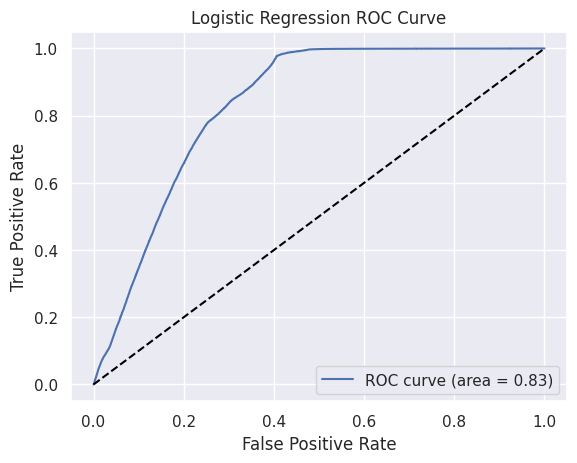

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lg)
plt.title('Logistic Regression ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % acu_lgt)
plt.plot([0, 1], [0, 1], linestyle="--", color='black')
plt.legend(loc="lower right")
plt.show()

[[59520 40616]
 [ 2405 98099]]




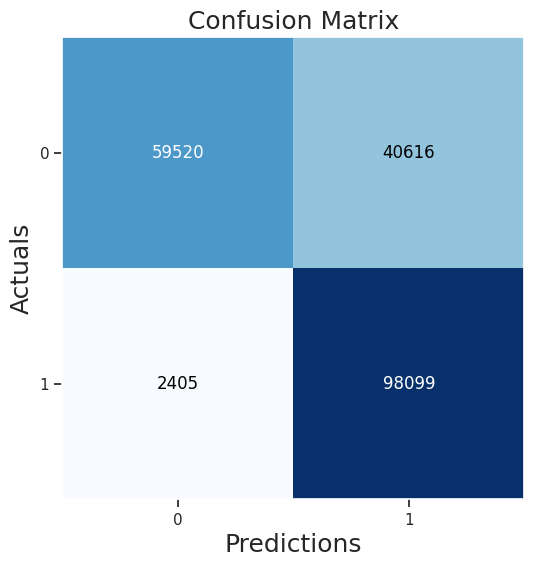

In [ ]:
# Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_lg)
print(cm_logistic)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_logistic, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100136
           1       0.71      0.98      0.82    100504

    accuracy                           0.79    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.83      0.79      0.78    200640



In [ ]:
# Logistic Regression Coefficients
print(logistic_model.coef_)

[[-0.0566499  -0.24768391 -1.75013258  0.46081146  0.92220423  0.04579603
  -0.00512298]]


Previously_Insured   -1.750133
Age                  -0.247684
Gender               -0.056650
Vintage              -0.005123
Annual_Premium        0.045796
Vehicle_Age           0.460811
Vehicle_Damage        0.922204
dtype: float64




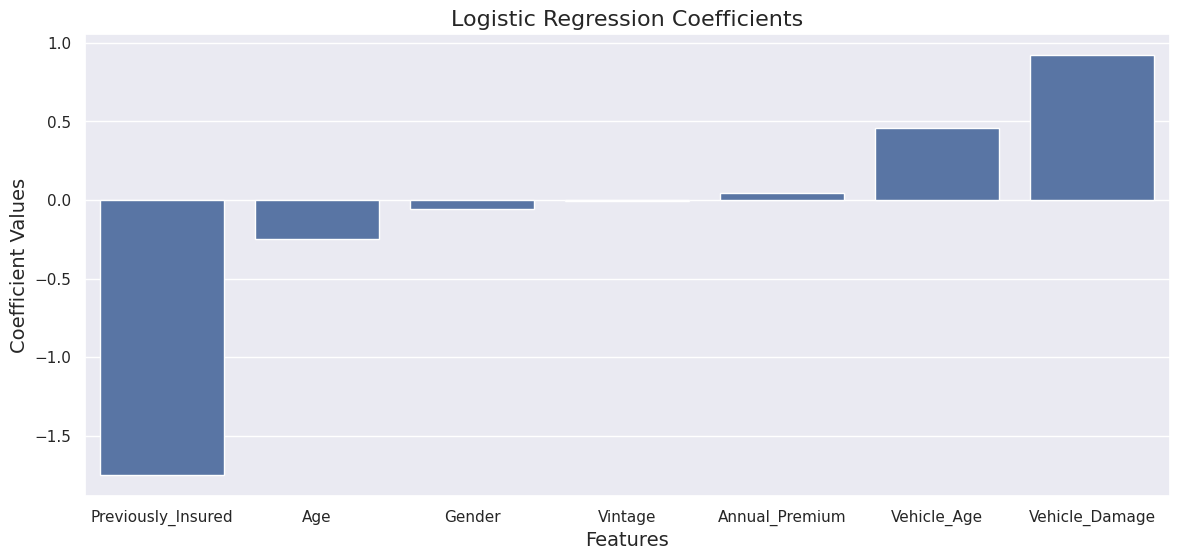

In [ ]:
coef = pd.Series(data=logistic_model.coef_[0], index=x.columns)
coef = coef.sort_values()
print(coef)
print('\n')
plt.figure(figsize=(14, 6))
sns.barplot(x=coef.index, y=coef.values)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficient Values', fontsize=14)
plt.title('Logistic Regression Coefficients', fontsize=16)
plt.show()

##### KNN

In [ ]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=7)  # Adjust n_components based on your dataset
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Importing and training KNN model
knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(X_train_pca, y_train)

In [ ]:
# Making predictions
knn_pred = knn_model.predict(X_test_pca)
knn_pred_prob = knn_model.predict_proba(X_test_pca)[:, 1]

In [ ]:
# Evaluation
RS_knn = recall_score(y_test, knn_pred)
print("Recall Score: ", RS_knn)

PS_knn = precision_score(y_test, knn_pred)
print("Precision Score:", PS_knn)

f1S_knn = f1_score(y_test, knn_pred)
print("F1 Score:", f1S_knn)

AS_knn = accuracy_score(y_test, knn_pred)
print("Accuracy Score:", AS_knn)

acu_knn = roc_auc_score(y_test, knn_pred_prob)
print("ROC AUC Score:", acu_knn)

Recall Score:  0.9650561171694659
Precision Score: 0.7912030541325416
F1 Score: 0.8695246804009108
Accuracy Score: 0.8549242424242425
ROC AUC Score: 0.9138891088915857


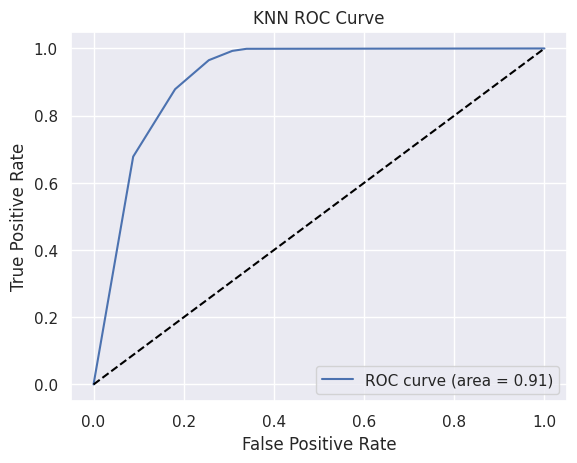

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn_pred_prob)
plt.title('KNN ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % acu_knn)
plt.plot([0, 1], [0, 1], linestyle="--", color='black')
plt.legend(loc="lower right")
plt.show()

[[74540 25596]
 [ 3512 96992]]




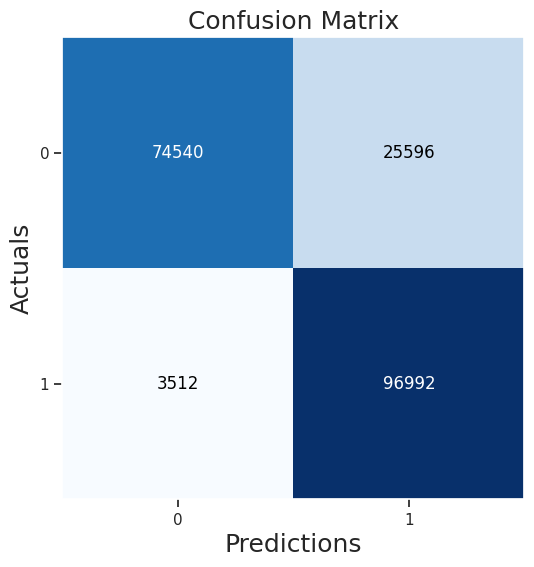

In [ ]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_pred)
print(cm_knn)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_knn, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84    100136
           1       0.79      0.97      0.87    100504

    accuracy                           0.85    200640
   macro avg       0.87      0.85      0.85    200640
weighted avg       0.87      0.85      0.85    200640



#### LightBGM

In [ ]:
# Importing and training LGBM model
lgbm_model = LGBMClassifier(random_state=30)
lgbm_model = lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 233895, number of negative: 234263
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 468158, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499607 -> initscore=-0.001572
[LightGBM] [Info] Start training from score -0.001572


In [ ]:
# Making predictions
lgbm_pred = lgbm_model.predict(X_test)
lgbm_pred_prob = lgbm_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation
RS_lgbm = recall_score(y_test, lgbm_pred)
print("Recall Score: ", RS_lgbm)

PS_lgbm = precision_score(y_test, lgbm_pred)
print("Precision Score:", PS_lgbm)

f1S_lgbm = f1_score(y_test, lgbm_pred)
print("F1 Score:", f1S_lgbm)

AS_lgbm = accuracy_score(y_test, lgbm_pred)
print("Accuracy Score:", AS_lgbm)

acu_lgbm = roc_auc_score(y_test, lgbm_pred_prob)
print("ROC AUC Score:", acu_lgbm)

Recall Score:  0.9261422430948022
Precision Score: 0.7368200240643404
F1 Score: 0.8207043097975594
Accuracy Score: 0.797298644338118
ROC AUC Score: 0.8491994591089302


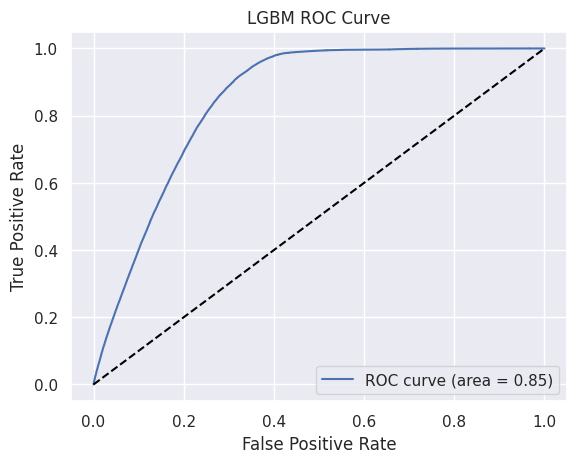

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lgbm_pred_prob)
plt.title('LGBM ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % acu_lgbm)
plt.plot([0, 1], [0, 1], linestyle="--", color='black')
plt.legend(loc="lower right")
plt.show()

[[66889 33247]
 [ 7423 93081]]




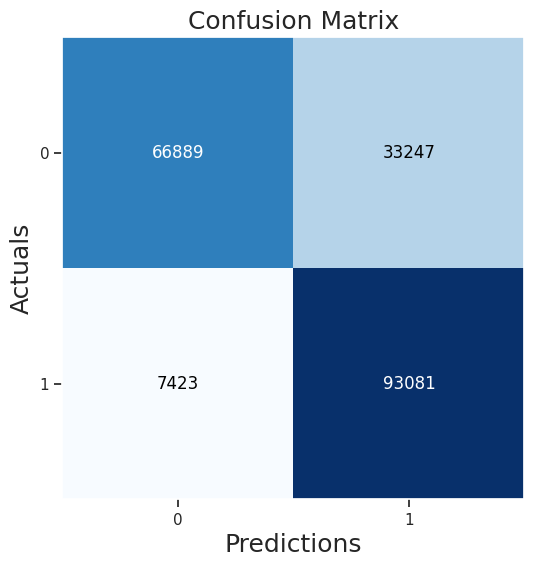

In [ ]:
# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, lgbm_pred)
print(cm_lgbm)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_lgbm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77    100136
           1       0.74      0.93      0.82    100504

    accuracy                           0.80    200640
   macro avg       0.82      0.80      0.79    200640
weighted avg       0.82      0.80      0.79    200640



#### Hyperparameter Tunning for Linear Regression

In [ ]:
# Hyperparameter Tuning for Linear Regression
param_grid_lr = {'fit_intercept': [True, False]}
lr_model = LinearRegression()
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Linear Regression: ", grid_search_lr.best_params_)
print("Best score for Linear Regression: ", -grid_search_lr.best_score_)

Best parameters for Linear Regression:  {'fit_intercept': True}
Best score for Linear Regression:  0.15266705731780478


In [ ]:
# Making predictions
y_pred_lr = grid_search_lr.predict(X_test)
y_pred_prob_lr = grid_search_lr.best_estimator_.predict(X_test)

In [ ]:
# Evaluation
RS_lr = recall_score(y_test, y_pred_prob_lr.round())
print("Recall_Score:", RS_lr)

PS_ls = precision_score(y_test, y_pred_prob_lr.round())
print("Precision_Score:", PS_ls)

f1S_lr = f1_score(y_test, y_pred_prob_lr.round())
print("f1_Score:", f1S_lr)

AS_lr = accuracy_score(y_test, y_pred_prob_lr.round())
print("Accuracy_Score:", AS_lr)

acu_lr = roc_auc_score(y_test, y_pred_prob_lr.round())
print("ROC_AUC Score:", acu_lr)

Recall_Score: 0.9768566425216907
Precision_Score: 0.7072731464138547
f1_Score: 0.8204883919169633
Accuracy_Score: 0.7858851674641149
ROC_AUC Score: 0.7855342571879844


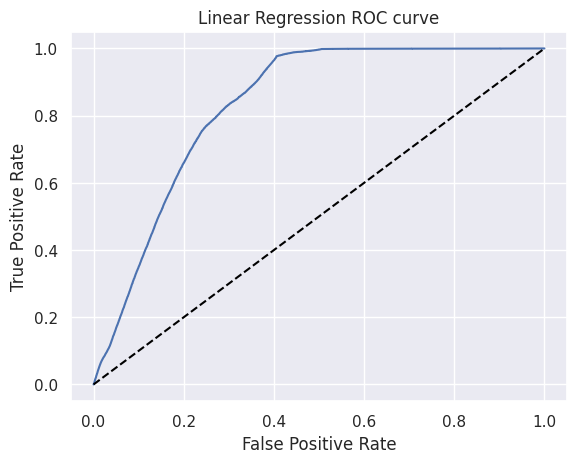

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
plt.title('Linear Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot((0, 1), linestyle="--", color='black')
plt.show()

[[59502 40634]
 [ 2326 98178]]




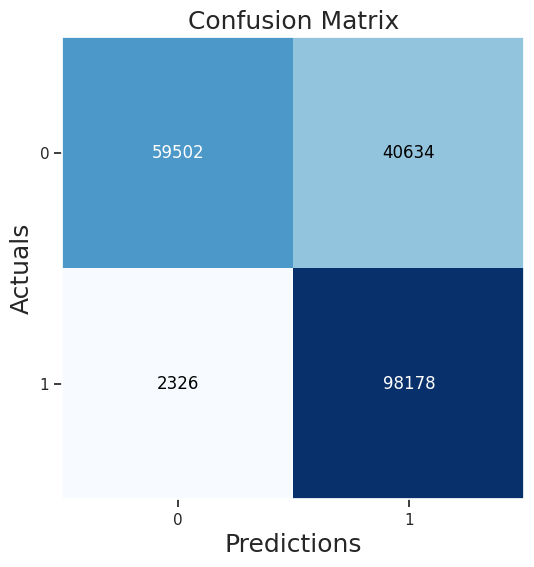

In [ ]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_prob_lr.round())
print(cm_lr)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_lr, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_prob_lr.round()))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100136
           1       0.71      0.98      0.82    100504

    accuracy                           0.79    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.83      0.79      0.78    200640



#### Hyperparameter Tunning for KNN

In [ ]:
# Hyperparameter Tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_model = KNeighborsClassifier()
random_search_knn = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid_knn, n_iter=5, cv=5, scoring='accuracy', random_state=30, n_jobs=-1)
random_search_knn.fit(X_train, y_train)

print("Best parameters for KNN: ", random_search_knn.best_params_)
print("Best score for KNN: ", random_search_knn.best_score_)

Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Best score for KNN:  0.8696508454097666


In [ ]:
# Making predictions
knn_pred = random_search_knn.predict(X_test)
knn_pred_prob = random_search_knn.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
RS_knn = recall_score(y_test, knn_pred)
print("Recall Score: ", RS_knn)

PS_knn = precision_score(y_test, knn_pred)
print("Precision Score: ", PS_knn)

f1S_knn = f1_score(y_test, knn_pred)
print("F1 Score: ", f1S_knn)

AS_knn = accuracy_score(y_test, knn_pred)
print("Accuracy Score: ", AS_knn)

acu_knn = roc_auc_score(y_test, knn_pred)
print("ROC AUC Score: ", acu_knn)

Recall Score:  0.9942290854095359
Precision Score:  0.8092322643343052
F1 Score:  0.8922423030216445
Accuracy Score:  0.8797049441786284
ROC AUC Score:  0.879494505954748


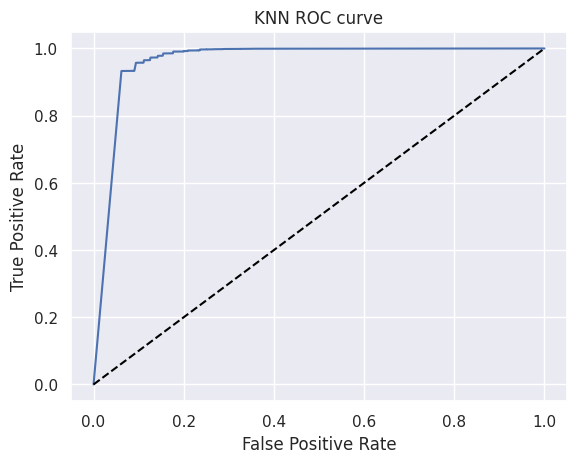

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn_pred_prob)
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot((0, 1), linestyle="--", color='black')
plt.show()

[[76580 23556]
 [  580 99924]]




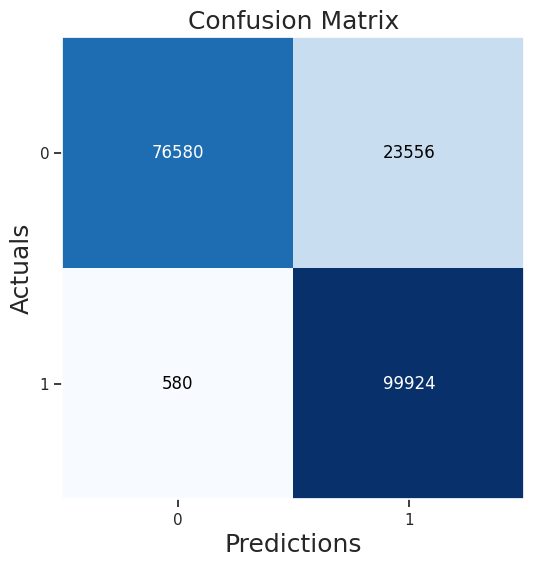

In [ ]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_pred)
print(cm_knn)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_knn, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86    100136
           1       0.81      0.99      0.89    100504

    accuracy                           0.88    200640
   macro avg       0.90      0.88      0.88    200640
weighted avg       0.90      0.88      0.88    200640



#### Hyperparameter Tunning for LightBGM

In [ ]:
# Hyperparameter Tuning for LightGBM
param_dist_lgbm = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': sp_randint(30, 60),
    'max_depth': sp_randint(5,30)
}
lgbm_model = LGBMClassifier(random_state=30, verbose=-1)
random_search_lgbm = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_dist_lgbm, n_iter=5, cv=5, scoring='accuracy', random_state=30, n_jobs=-1)
random_search_lgbm.fit(X_train, y_train)
print("Best parameters for LightGBM: ", random_search_lgbm.best_params_)
print("Best score for LightGBM: ", random_search_lgbm.best_score_)

Best parameters for LightGBM:  {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500, 'num_leaves': 43}
Best score for LightGBM:  0.8014751439463066


In [ ]:
# Making predictions
lgbm_pred = random_search_lgbm.predict(X_test)
lgbm_pred_prob = random_search_lgbm.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
RS_lgbm = recall_score(y_test, lgbm_pred)
print("Recall Score: ", RS_lgbm)

PS_lgbm = precision_score(y_test, lgbm_pred)
print("Precision Score: ", PS_lgbm)

f1S_lgbm = f1_score(y_test, lgbm_pred)
print("F1 Score: ", f1S_lgbm)

AS_lgbm = accuracy_score(y_test, lgbm_pred)
print("Accuracy Score: ", AS_lgbm)

acu_lgbm = roc_auc_score(y_test, lgbm_pred)
print("ROC AUC Score: ", acu_lgbm)


Recall Score:  0.9324603995860862
Precision Score:  0.7420110847189232
F1 Score:  0.826405178039188
Accuracy Score:  0.8037679425837321
ROC AUC Score:  0.8035314700654727


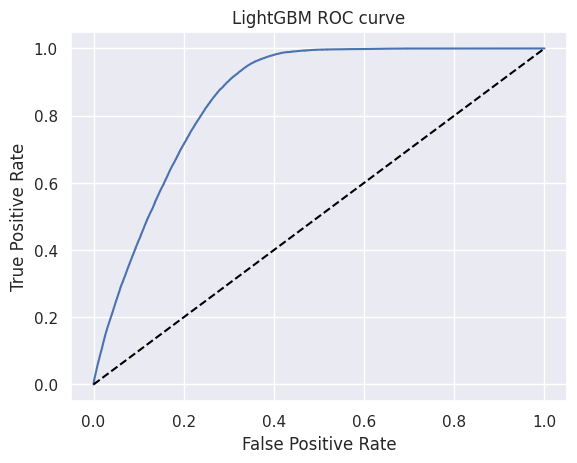

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lgbm_pred_prob)
plt.title('LightGBM ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot((0, 1), linestyle="--", color='black')
plt.show()

[[67552 32584]
 [ 6788 93716]]




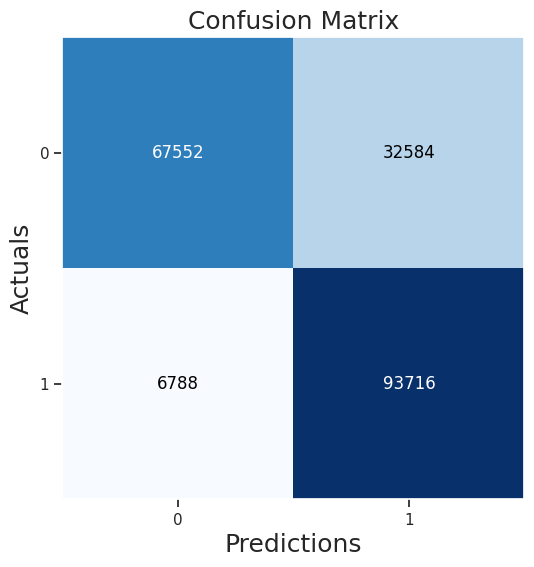

In [ ]:
# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, lgbm_pred)
print(cm_lgbm)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_lgbm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77    100136
           1       0.74      0.93      0.83    100504

    accuracy                           0.80    200640
   macro avg       0.83      0.80      0.80    200640
weighted avg       0.83      0.80      0.80    200640



#### Gradient Boosting

In [ ]:
# Initialize and train the Gradient Boosting Classifier
GB_model = GradientBoostingClassifier(random_state=30)
GB_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=30)

In [ ]:
# Make predictions
GB_pred = GB_model.predict(X_test)
GB_pred_prob = GB_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
RS_GB = recall_score(y_test, GB_pred)
print("Recall Score:", RS_GB)

PS_GB = precision_score(y_test, GB_pred)
print("Precision Score:", PS_GB)

f1S_GB = f1_score(y_test, GB_pred)
print("F1 Score:", f1S_GB)

AS_GB = accuracy_score(y_test, GB_pred)
print("Accuracy Score:", AS_GB)

acu_GB = roc_auc_score(y_test, GB_pred)
print("ROC AUC Score:", acu_GB)

Recall Score: 0.9259531958927008
Precision Score: 0.7348663118495239
F1 Score: 0.8194169286173406
Accuracy Score: 0.7955641945773525
ROC AUC Score: 0.7953246046572235


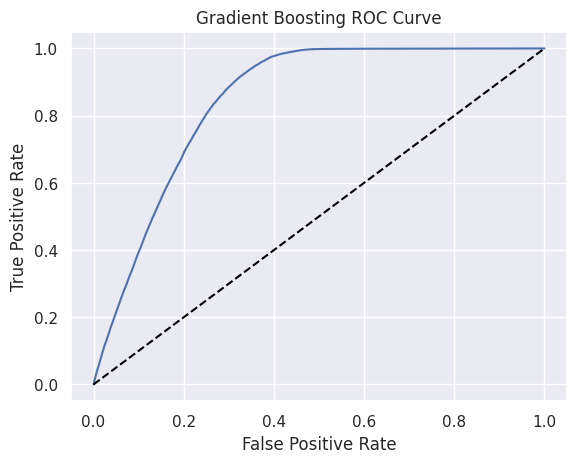

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, GB_pred_prob)
plt.title('Gradient Boosting ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot((0,1), linestyle="--", color='black')
plt.show()

Confusion Matrix:
 [[66560 33576]
 [ 7442 93062]]




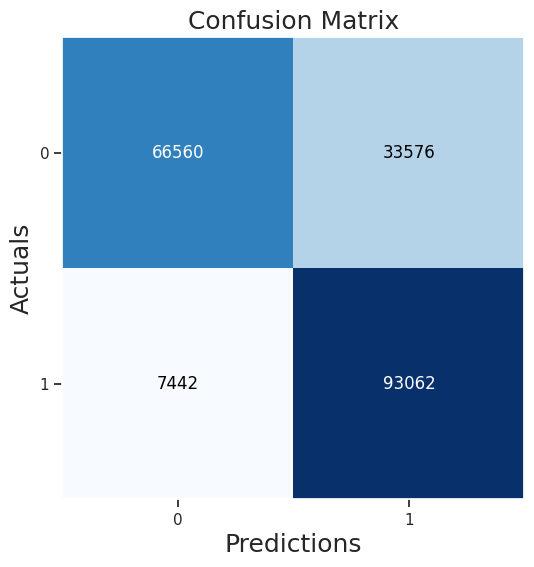

In [ ]:
# Confusion Matrix
cm_GB = confusion_matrix(y_test, GB_pred)
print("Confusion Matrix:\n", cm_GB)
print('\n')

# Plotting Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_GB, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, GB_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.66      0.76    100136
           1       0.73      0.93      0.82    100504

    accuracy                           0.80    200640
   macro avg       0.82      0.80      0.79    200640
weighted avg       0.82      0.80      0.79    200640



#### Dicision Tree

In [ ]:
# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=30)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [ ]:
# Make predictions
dt_pred = dt_model.predict(X_test)
dt_pred_prob = dt_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
RS_dt = recall_score(y_test, dt_pred)
print("Recall Score:", RS_dt)

PS_dt = precision_score(y_test, dt_pred)
print("Precision Score:", PS_dt)

f1S_dt = f1_score(y_test, dt_pred)
print("F1 Score:", f1S_dt)

AS_dt = accuracy_score(y_test, dt_pred)
print("Accuracy Score:", AS_dt)

acu_dt = roc_auc_score(y_test, dt_pred)
print("ROC AUC Score:", acu_dt)

Recall Score: 0.9928560057311152
Precision Score: 0.8857269660926682
F1 Score: 0.9362368880298738
Accuracy Score: 0.9322567783094099
ROC AUC Score: 0.9321454271685057


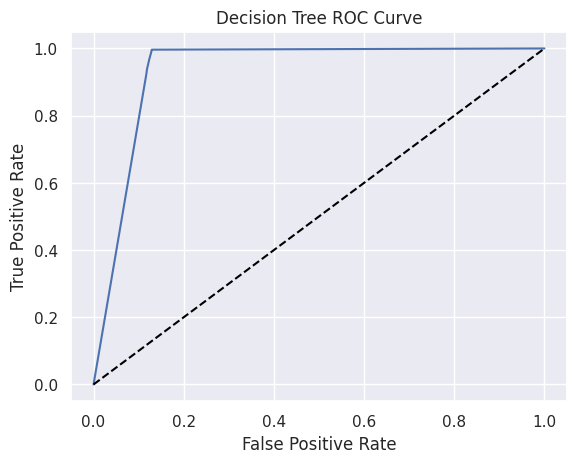

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt_pred_prob)
plt.title('Decision Tree ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot((0,1), linestyle="--", color='black')
plt.show()

Confusion Matrix:
 [[87262 12874]
 [  718 99786]]




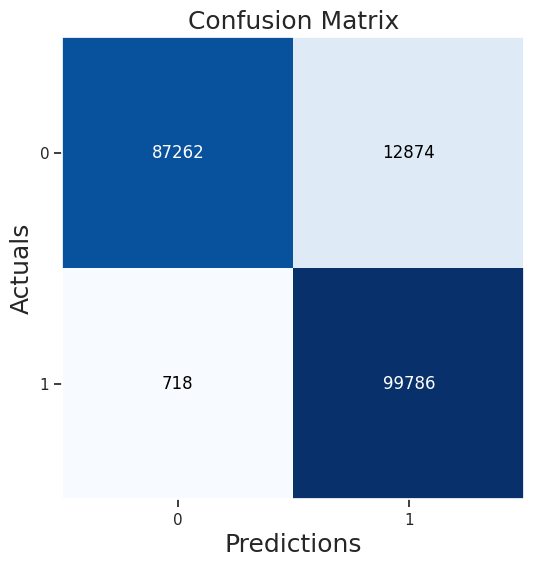

In [ ]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:\n", cm_dt)
print('\n')

# Plotting Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_dt, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, dt_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93    100136
           1       0.89      0.99      0.94    100504

    accuracy                           0.93    200640
   macro avg       0.94      0.93      0.93    200640
weighted avg       0.94      0.93      0.93    200640



#### Random Forest

In [ ]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=30)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [ ]:
# Make predictions
rf_pred = rf_model.predict(X_test)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
RS_rf = recall_score(y_test, rf_pred)
print("Recall Score:", RS_rf)

PS_rf = precision_score(y_test, rf_pred)
print("Precision Score:", PS_rf)

f1S_rf = f1_score(y_test, rf_pred)
print("F1 Score:", f1S_rf)

AS_rf = accuracy_score(y_test, rf_pred)
print("Accuracy Score:", AS_rf)

acu_rf = roc_auc_score(y_test, rf_pred)
print("ROC AUC Score:", acu_rf)

Recall Score: 0.9944479821698639
Precision Score: 0.8800542406311637
F1 Score: 0.9337606039089652
Accuracy Score: 0.9293261562998405
ROC AUC Score: 0.9292064948797709


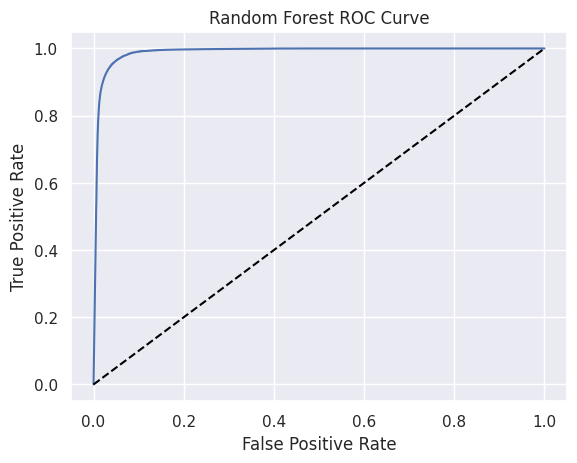

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred_prob)
plt.title('Random Forest ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot((0,1), linestyle="--", color='black')
plt.show()

Confusion Matrix:
 [[86514 13622]
 [  558 99946]]




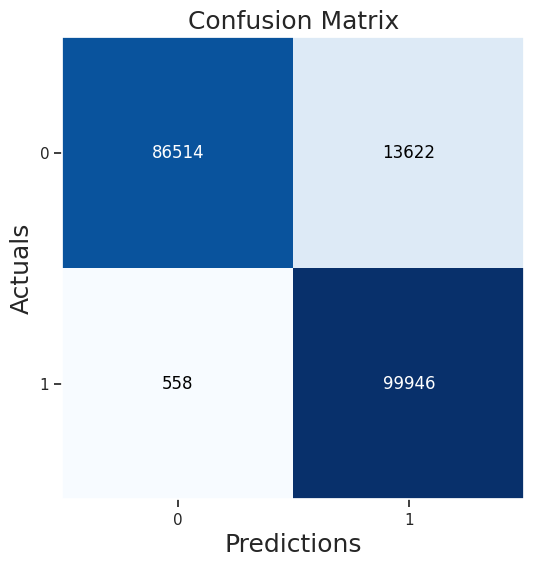

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", cm_rf)
print('\n')

# Plotting Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_rf, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, rf_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92    100136
           1       0.88      0.99      0.93    100504

    accuracy                           0.93    200640
   macro avg       0.94      0.93      0.93    200640
weighted avg       0.94      0.93      0.93    200640



#### XGBoost

In [ ]:
# Initialize and train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=30)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [ ]:
# Make predictions
xgb_pred = xgb_model.predict(X_test)
xgb_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
RS_xgb = recall_score(y_test, xgb_pred)
print("Recall Score:", RS_xgb)

PS_xgb = precision_score(y_test, xgb_pred)
print("Precision Score:", PS_xgb)

f1S_xgb = f1_score(y_test, xgb_pred)
print("F1 Score:", f1S_xgb)

AS_xgb = accuracy_score(y_test, xgb_pred)
print("Accuracy Score:", AS_xgb)

acu_xgb = roc_auc_score(y_test, xgb_pred)
print("ROC AUC Score:", acu_xgb)

Recall Score: 0.9335250338294994
Precision Score: 0.7433997844827587
F1 Score: 0.8276844631073786
Accuracy Score: 0.805293062200957
ROC AUC Score: 0.8050574358250318


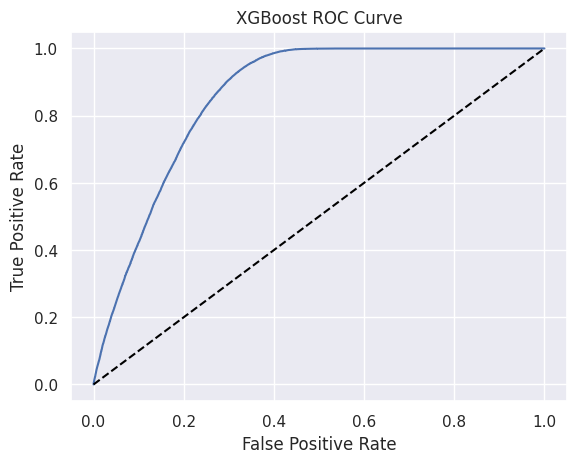

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred_prob)
plt.title('XGBoost ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot((0,1), linestyle="--", color='black')
plt.show()

In [ ]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_pred)
print("Confusion Matrix:\n", cm_xgb)
print('\n')

Confusion Matrix:
 [[67751 32385]
 [ 6681 93823]]




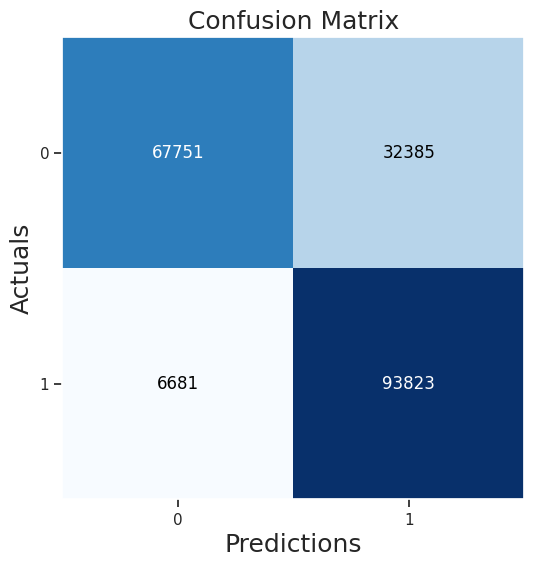

In [ ]:
# Plotting Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_xgb, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78    100136
           1       0.74      0.93      0.83    100504

    accuracy                           0.81    200640
   macro avg       0.83      0.81      0.80    200640
weighted avg       0.83      0.81      0.80    200640



#### Final result

Results for Logistic Regression:
------------------------------
Accuracy: 0.7856
Precision: 0.7072
Recall: 0.9761
F1-score: 0.8202
ROC AUC: 0.8321
Confusion Matrix:
[[59520 40616]
 [ 2405 98099]]



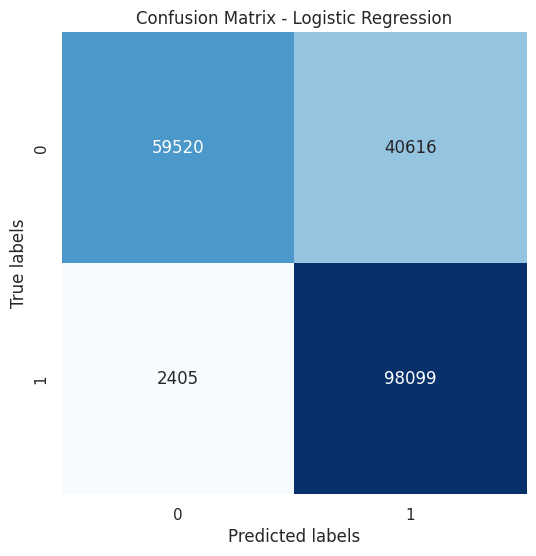

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100136
           1       0.71      0.98      0.82    100504

    accuracy                           0.79    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.83      0.79      0.78    200640


Results for KNN:
------------------------------
Accuracy: 0.8797
Precision: 0.8092
Recall: 0.9942
F1-score: 0.8922
ROC AUC: 0.9617
Confusion Matrix:
[[76580 23556]
 [  580 99924]]



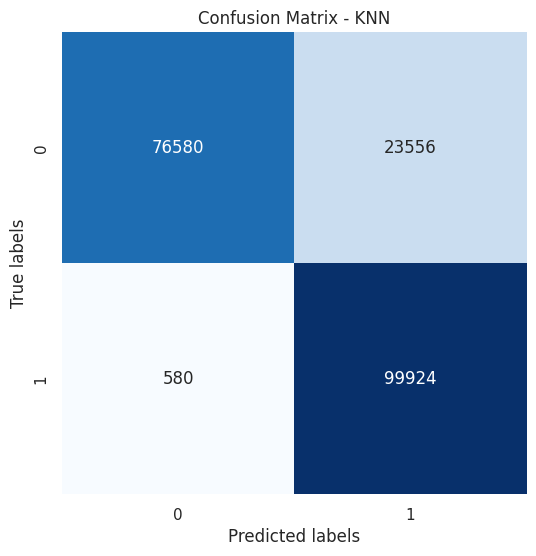

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86    100136
           1       0.81      0.99      0.89    100504

    accuracy                           0.88    200640
   macro avg       0.90      0.88      0.88    200640
weighted avg       0.90      0.88      0.88    200640


Results for LightGBM:
------------------------------
Accuracy: 0.8038
Precision: 0.7420
Recall: 0.9325
F1-score: 0.8264
ROC AUC: 0.8574
Confusion Matrix:
[[67552 32584]
 [ 6788 93716]]



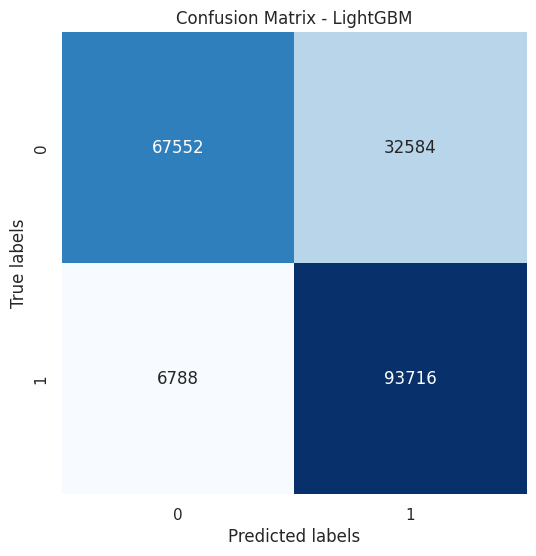

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77    100136
           1       0.74      0.93      0.83    100504

    accuracy                           0.80    200640
   macro avg       0.83      0.80      0.80    200640
weighted avg       0.83      0.80      0.80    200640


Results for Gradient Boosting:
------------------------------
Accuracy: 0.7956
Precision: 0.7349
Recall: 0.9260
F1-score: 0.8194
ROC AUC: 0.8482
Confusion Matrix:
[[66560 33576]
 [ 7442 93062]]



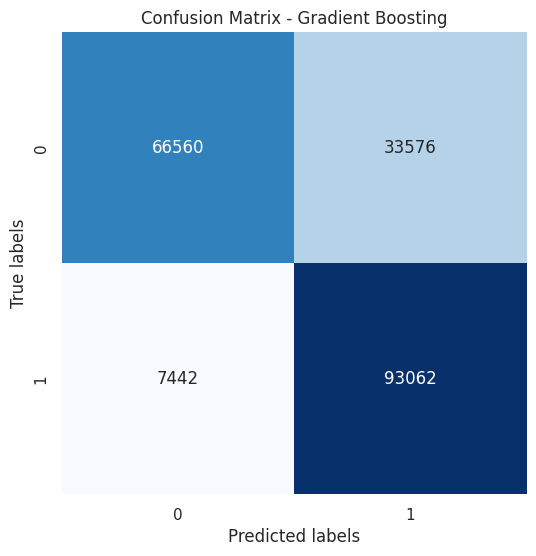

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76    100136
           1       0.73      0.93      0.82    100504

    accuracy                           0.80    200640
   macro avg       0.82      0.80      0.79    200640
weighted avg       0.82      0.80      0.79    200640


Results for Decision Tree:
------------------------------
Accuracy: 0.9323
Precision: 0.8857
Recall: 0.9929
F1-score: 0.9362
ROC AUC: 0.9350
Confusion Matrix:
[[87262 12874]
 [  718 99786]]



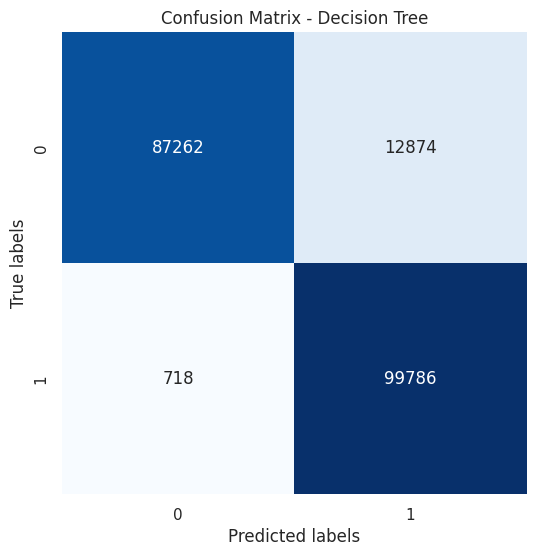

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93    100136
           1       0.89      0.99      0.94    100504

    accuracy                           0.93    200640
   macro avg       0.94      0.93      0.93    200640
weighted avg       0.94      0.93      0.93    200640


Results for Random Forest:
------------------------------
Accuracy: 0.9293
Precision: 0.8801
Recall: 0.9944
F1-score: 0.9338
ROC AUC: 0.9893
Confusion Matrix:
[[86514 13622]
 [  558 99946]]



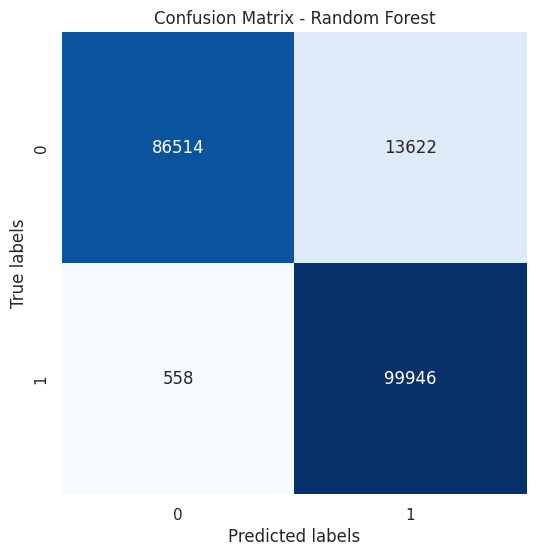

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92    100136
           1       0.88      0.99      0.93    100504

    accuracy                           0.93    200640
   macro avg       0.94      0.93      0.93    200640
weighted avg       0.94      0.93      0.93    200640


Results for XGBoost:
------------------------------
Accuracy: 0.8053
Precision: 0.7434
Recall: 0.9335
F1-score: 0.8277
ROC AUC: 0.8586
Confusion Matrix:
[[67751 32385]
 [ 6681 93823]]



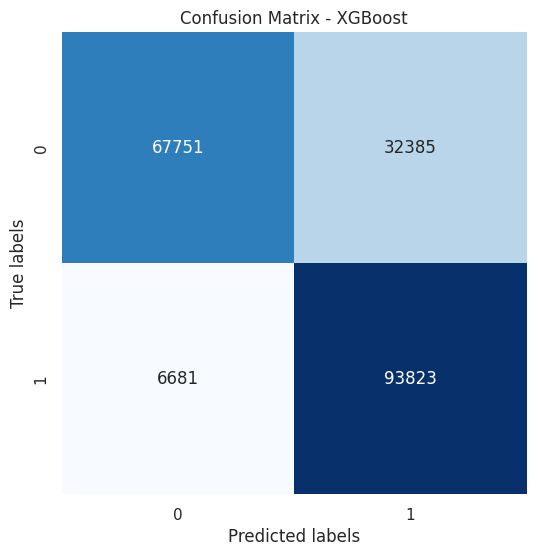

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78    100136
           1       0.74      0.93      0.83    100504

    accuracy                           0.81    200640
   macro avg       0.83      0.81      0.80    200640
weighted avg       0.83      0.81      0.80    200640




In [ ]:
# List of models and their predictions
models = ['Logistic Regression', 'KNN', 'LightGBM', 'Gradient Boosting', 'Decision Tree', 'Random Forest', 'XGBoost']
predictions = [y_pred_lg, knn_pred, lgbm_pred, GB_pred, dt_pred, rf_pred, xgb_pred]
pred_probs = [y_pred_prob_lg, knn_pred_prob, lgbm_pred_prob, GB_pred_prob, dt_pred_prob, rf_pred_prob, xgb_pred_prob]

# Evaluate and print results for each model
for model, y_pred, y_pred_prob in zip(models, predictions, pred_probs):
    print(f"Results for {model}:")
    print("-" * 30)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    cm = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print()

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model}')
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("=" * 50)
    print()

[LightGBM] [Info] Number of positive: 233895, number of negative: 234263
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 468158, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499607 -> initscore=-0.001572
[LightGBM] [Info] Start training from score -0.001572


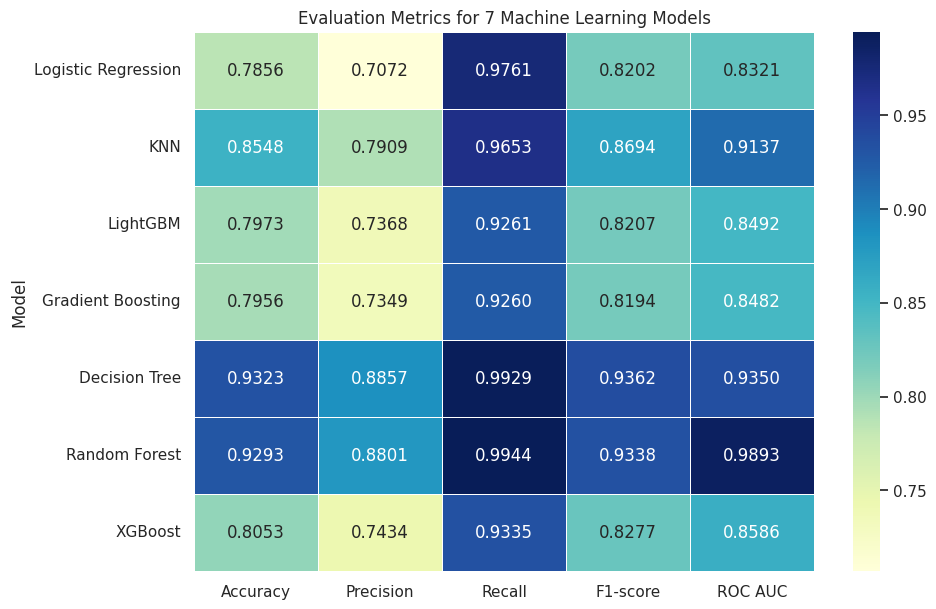

In [ ]:
# models
models = {
    'Logistic Regression': LogisticRegression(random_state=30),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(random_state=30),
    'Gradient Boosting': GradientBoostingClassifier(random_state=30),
    'Decision Tree': DecisionTreeClassifier(random_state=30),
    'Random Forest': RandomForestClassifier(random_state=30),
    'XGBoost': XGBClassifier(random_state=30, verbosity=0)
}

# Initialize lists to store metrics
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Append metrics to lists
    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores,
    'ROC AUC': roc_auc_scores
})

# Set the index to 'Model'
metrics_df.set_index('Model', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.4f', linewidths=.5)
plt.title('Evaluation Metrics for 7 Machine Learning Models')
plt.show()

# **Conclusion**

After loading the dataset, initial checks for duplicates and null values revealed none, eliminating the need for data cleaning. The exploratory data analysis revealed several insights:

*  Gender distribution was nearly balanced, with a slightly higher proportion of males. Interestingly, a higher percentage of males showed interest in purchasing vehicle insurance.
*  The dataset showed a significant imbalance, with only 12.3% of individuals interested in vehicle insurance, highlighting a challenge for targeting potential customers effectively.
*  Almost all individuals (99.8%) possessed a driving license, indicating a mandatory requirement for vehicle ownership.
*  Previous insurance ownership was noted in 45.8% of cases, with a portion (12.2%) of these individuals showing interest in renewing their insurance, indicating a market segment aware of insurance benefits.
*  Vehicle age was diverse, with a notable interest in insurance observed among vehicles aged one to two years, suggesting awareness of risk management as vehicles age.
*  Approximately half of the vehicles (50.5%) had previous damage, with 12.0% of these cases interested in insurance, indicating awareness among those who've experienced vehicle damage.
*  Age-wise, individuals in the Adults age group demonstrated higher interest in insurance, aligning with their higher likelihood of vehicle ownership and insurance purchase intent.


Following exploratory analysis, data preprocessing involved log transformation to handle outliers and encoding categorical features before splitting the dataset into training and testing subsets. Seven machine learning algorithms were applied, with hyperparameter tuning performed on three models to optimize performance.